**CAPSTONE PROJECT MODUL 2 RIEVAL ERLANGGA WIJANARKO
JDCSOL-14  GROUP 1** 

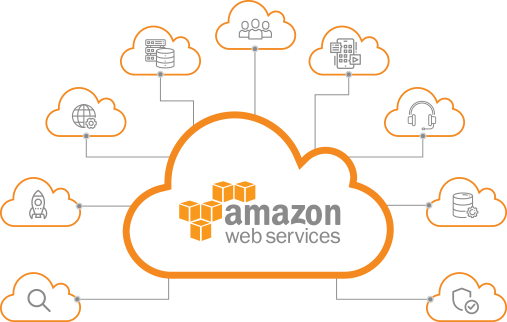

**PENDAHULUAN**

Perusahaan Amazon Web Services adalah sebuah perusahaan yang menjual Sales & Marketing Software (Software as a Service/SaaS) ke Perusahaan lain yang memungkinkan Perusahaan untuk menyediakan penawaran mereka kepada pelanggan dengan cara yang mudah dan terpusat pada layanan. AWS bekerja sama dengan Perusahaan untuk membangun model SaaS yang menetapkan kelincahan dan efisiensi operasional sebagai pilar strategi bisnis mereka serta mendorong pertumbuhan, jangkauan dan inovasi.


**PERNYATAAN MASALAH**

1. Bagaimana cara menganalisis faktor-faktor yang berkontribusi terhadap profitabilitas negatif dalam penjualan produk SaaS di AWS dan memberikan rekomendasi untuk meningkatkan profitabilitas produk tersebut berdasarkan kinerja penjualan perusahaan, segmen pelanggan, dan pasar perusahaan?
2. Apa saja insight dan actionable recommendations yang dapat diambil dari analisis data ini?
3. Apa saja Produk Software yang menghasilkan profit dalam penjualan?
4. Apa saja Produk Software yang menghasilkan kerugian dalam penjualan?

**TUJUAN UTAMA**

Tujuan utamanya adalah untuk memberikan wawasan kepada perusahaan AWS (Amazon Web Service), yang berfokus pada fitur SaaS, untuk memahami dan mengoptimalkan kinerja bisnis mereka terutama jika profitabilitas perusahaan negatif karena faktor-faktor yang mungkin didasarkan pada kinerja penjualan perusahaan, segmen pelanggan , dan pasar perusahaan.

**DATA PREPARATION & PROCESSING**

Untuk menjawab pernyataan masalah seperti yang telah dijelaskan di atas, dataset yang ada akan diolah dan dianalisa. sebelumnya dilakukan persiapan dan pemrosesan data yang meliputi Data Understanding dan Data Cleaning. Langkah yang perlu dilakukan yaitu mempersiapkan Import Libraries dan Tools yang dibutuhkan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)

Langkah berikutnya yang perlu dilakukan yaitu import dan read dataset dari directory local files. Dataset awal dapat diakses pada [link](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales) ini. Contohnya 5 data teratas dan 5 data terbawahsebagai berikut:

In [3]:
df=pd.read_csv('SaaS-Sales.csv',
               parse_dates=['Order Date'],      #Mengganti format pada Order Date dari oject menjadi datetime64[ns]
               dtype={'Customer ID': str})      #Mengganti format pada Customer ID dari int64 menjadi object
display(df.head(),df.tail())
#Berikut 5 baris teratas dan terbawah dari tables SaaS-Sales.csv

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Seperti yang telah diperlihatkan pada Display di atas, dataset ini berisi data transaksi dari perusahaan SaaS fiktif yang menjual Sales & Marketing Software ke perusahaan lain (B2B). Dalam kumpulan data, setiap baris mewakili produk dalam suatu transaksi,
dan kolomnya meliputi:
* **Nama Kolom**          * **Deskripsi Kolom**                             
* **Row ID**                Pengidentifikasi unik untuk setiap transaksi.
* **Order ID**              Pengidentifikasi unik untuk setiap order.
* **Order Date**            Tanggal pemesanan dilakukan.
* **Date Key**              Representasi numerik dari tanggal pemesanan (YYYYMMDD).
* **Contact Name**          Nama orang yang melakukan pemesanan.
* **Country**               Negara tempat pemesanan dilakukan.
* **City**                  Negara tempat pemesanan dilakukan.
* **Region**                Wilayah tempat pemesanan dilakukan.
* **Subregion**             Subwilayah tempat pemesanan dilakukan.
* **Customer**              Nama perusahaan yang melakukan pemesanan.
* **Customer ID**           Pengindentifikasi unik untuk setiap pelanggan.
* **Industry**              Industri tempat pelanggan berada.
* **Segment**               Segmen pelanggan (Small to Midsize Business/UMK, Enterprise, Dll).
* **Product**               Produk yang dipesan.
* **License**               lisensi untuk product.
* **Sales**                 Jumlah total penjualan untuk transaksi.
* **Quantity**              Jumlah total item dalam transaksi.
* **Discount**              Diskon yang berlaku pada transaksi.
* **Profit**                Keuntungan dari transaksi.

Berikut merupakan Informasi General terkait dataset yang akan dianalisa.


In [4]:
print(f'Informasi General beserta jumlah kolom dan baris adalah {df.shape}')
df.info()

Informasi General beserta jumlah kolom dan baris adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 no

pada dataframe di atas telah dilakukan pengubahan datatype pada kolom `Order Date` yang sebelumnya bertipe Object kemudian diubah menjadi datetime64[ns] & kolom `Customer ID` yang sebelumnya bertipe int64 diubah menjadi object.

In [5]:
display(df.describe(), df.describe(include='object'))
# count ==> Jumlah data - baris
# mean => nilai rata-rata
# std => standar deviasi => seberapa jauh - menyimpang data dari nilai mean nya -> contoh nilai std dari uang_saku = 0, karena tidak ada nilai yg menyimpang dari nilai mean
# min => nilai minimum
# 25% => Q1 => Kuartil 1 ==> Nilai median-nilai tengah antara nilai MIN dan 50% (Q2)
# 50% => Q2 => Kuartil 2 ==> Nilai Median ==> Nilai median/nilai tengah antara bnilai MIN dan MAX
# 75% => Q3 => Kuartil 3 => Nilai median antara nilai 50% dan nilai MAX
# Max => Nilai Maksimum

,Row ID,Order Date,Date Key,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


Dataframe diatas menampilkan Statistik Deskriptif.

Secara umum, kita bisa melihat bahwa:
* dataset AWS SaaS-Sales memiliki 19 kolom dan 9994 baris.
* kolom `Row ID` tidak relevan dengan analisis yang dilakukan, sehingga bisa dihapus.
* kolom `Order Date` berupa object, sehingga kita perlu merubahnya menjadi datetime64.
* kolom `Date Key`. Dari penjelasannya, kolom ini hampir mirip dengan Order Date hanya berbeda format penulisan, sehingga tidak relevan dan bisa dihapus saja.
* kolom `Customer ID` sebelumnya bertipe int64, dan data tersebut sudah diubah menjadi object agar lebih relevan.

**Setelah dilakukan Data Cleaning, dataset AWS SaaS-Sales memiliki 17 Kolom dan 9994 baris**

In [6]:
df = df.drop(columns=['Row ID', 'Date Key'])
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


**ADD NEW COLUMN OF PROFIT MARGIN**

Menambahkan kolom Profit Margin membantu kita memahami berapa banyak keuntungan yang diperoleh perusahaan dibandingkan dengan penjualannya. Ini menunjukkan seberapa efisien perusahaan mengubah penjualan menjadi keuntungan. Informasi ini membantu kami melacak perusahaan secara finansial dan mencari tahu di mana harus fokus untuk mendapatkan keuntungan yang lebih baik.

In [7]:
df["Profit Margin"] = round((df["Profit"] / df["Sales"]) * 100, 2)
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25


In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def dataUnique(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique Values'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

dataUnique(df)

,Columns,Unique Count,Unique Values
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bell, Deird

**Insight dari unique value pada setiap kolom**

* `Order ID`: Ada 5009 ID pesanan unik. ID ini tampaknya memiliki pola berdasarkan wilayah (EMEA, AMER, APJ) dan terdapat pengenal tahun dari ID tersebut untuk menunjukkan kapan pesanan tersebut dibeli.

* `Order Date` : Terdapat 1.237 tanggal pemesanan unik, yang menunjukkan bahwa kumpulan data mencakup rentang 04-01-2020 hingga 31-12-2023.

* `Contact Name` : Ada 793 nama kontak unik, yang menunjukkan keterlibatan beragam individu dalam pesanan.

* `Country` & `City` : Terdapat 48 negara unik dan 262 kota unik, yang mencerminkan distribusi geografis pelanggan yang luas.

* `Region` & `Subregion` : Terdapat 3 wilayah unik dan 12 subwilayah, yang mungkin mewakili klasifikasi geografis berbeda dalam wilayah tersebut.

* `Customer` & `Customer ID` : Terdapat 99 pelanggan unik dan ID pelanggan terkait, yang menunjukkan basis pelanggan yang beragam dan memang benar bahwa setiap pelanggan memiliki ID pelanggan unik masing-masing.

* `Industry` & `Segment` : Terdapat 10 industri unik dan 3 segmen unik yang menunjukkan variasi industri dan segmen pelanggan dalam kumpulan data.

* `Product` & `License` :Terdapat 14 produk unik dan 9994 kode lisensi unik. Hal ini menunjukkan serangkaian produk tetap dengan kode lisensi yang bervariasi.

* `Sales`, `Quantity`, `Discount` & `Profit` : Kolom ini berisi berbagai nilai numerik dengan rentang berbeda, yang menunjukkan beragam jumlah penjualan, kuantitas yang dipesan, tarif diskon yang diterapkan, dan laba yang dihasilkan di seluruh kumpulan data.

Setelah memahami data secara garis besar, perlu dicari apakah terdapat missing values atau tidak pada data diatas.

In [9]:
df.isna().sum()/df.shape[0]*100


Order ID         0.0
Order Date       0.0
Contact Name     0.0
Country          0.0
City             0.0
Region           0.0
Subregion        0.0
Customer         0.0
Customer ID      0.0
Industry         0.0
Segment          0.0
Product          0.0
License          0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
Profit Margin    0.0
dtype: float64

Dari dataframe diatas, bisa kita lihat bahwa dataset AWS SaaS-Sales tidak terdapat Missing Values pada keseluruhan kolom terdapat data tetapi untuk pertimbangan lebih lanjut, mari kita cek setiap kolom data

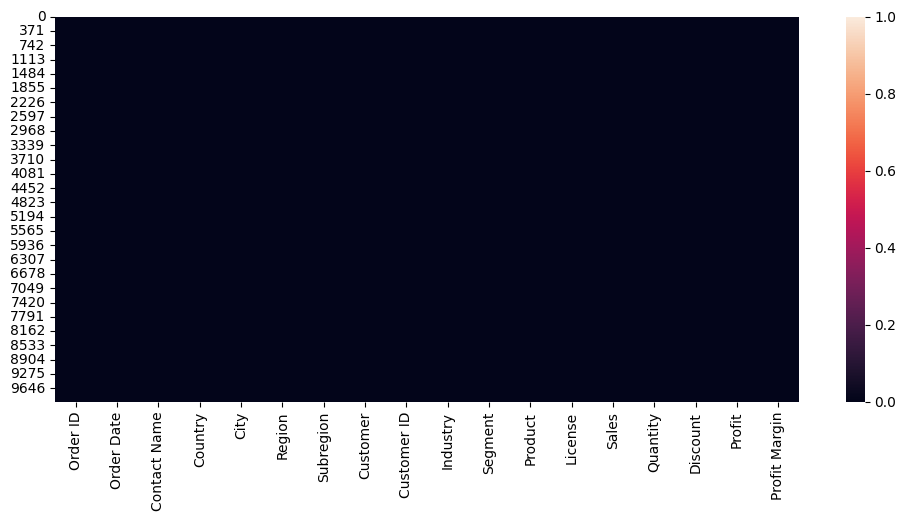

In [10]:
plt.figure(figsize = (12, 5))
sns.heatmap(data = df.isna(), vmin = 0, vmax = 1)
plt.show()

Seperti yang ditampilkan di atas, dataset AWS SaaS-Sales ini tidak memiliki missing value di setiap kolomnya.

dataset ini tidak perlu ditangani lebih lanjut untuk missing value. Hal ini terlihat sangat jelas ketika menampilkan kedua output diatas yang menunjukkan angka 0 (nol) pada setiap kolomnya, serta pada heatmap yang secara keseluruhan terlihat berwarna hitam pada setiap baris dan kolomnya serta tidak terdapat garis putih yang menandakan adanya missing values.


**WHITESPACE**

In [11]:
import re

In [12]:
def checkWhitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{>1,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespaceInfo = []
for columns in df.columns:
    hasWhitespace = df[columns].apply(checkWhitespace).any()
    whitespaceInfo.append({'Columns': columns, 'Has White space': hasWhitespace})

whiteSpace_df = pd.DataFrame(whitespaceInfo)
whiteSpace_df

,Columns,Has White space
0,Order ID,False
1,Order Date,False
2,Contact Name,False
3,Country,False
4,City,False
5,Region,False
6,Subregion,False
7,Customer,False
8,Customer ID,False
9,Industry,False


Dari dataframe diatas bisa dilihat kalau tidak terdapat adanya white space atau spasi berlebih pada dataset AWS SaaS-Sales

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin


Dari data checking untuk duplikat data pada dataset AWS SaaS-Sales tidak terdapat data ganda/data duplikat. 

In [15]:
# Mengecek data duplikat berdasarkan Order ID
duplicate_order_id = df[df.duplicated(subset=['Order ID'], keep=False)]
duplicate_order_id.head()


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25
5,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694,29.00


Dataframe diatas untuk memastikan tidak ada data ganda/data duplikat pada setiap baris, kita bisa menggunakan Order ID dimana kolom tersebut berisi unique value, dan dari data-data di atas tidak terdapat data duplikat di Order ID.

**OUTLIERS CHECK**

* Menggunakan Box plot untuk melihat berapa banyak outliers yang ditemukan pada dataset

Outliers adalah data yang secara signifikan berbeda dari data observasi. Outliers bisa mempengaruhi hasil dari pengambilan keputusan setelah analisa, ada beberapa faktor yang menyebabkan munculnya data outliers seperti kesalahan pencatatan, fakta di lapangan, kondisi yang tidak biasa, dll.

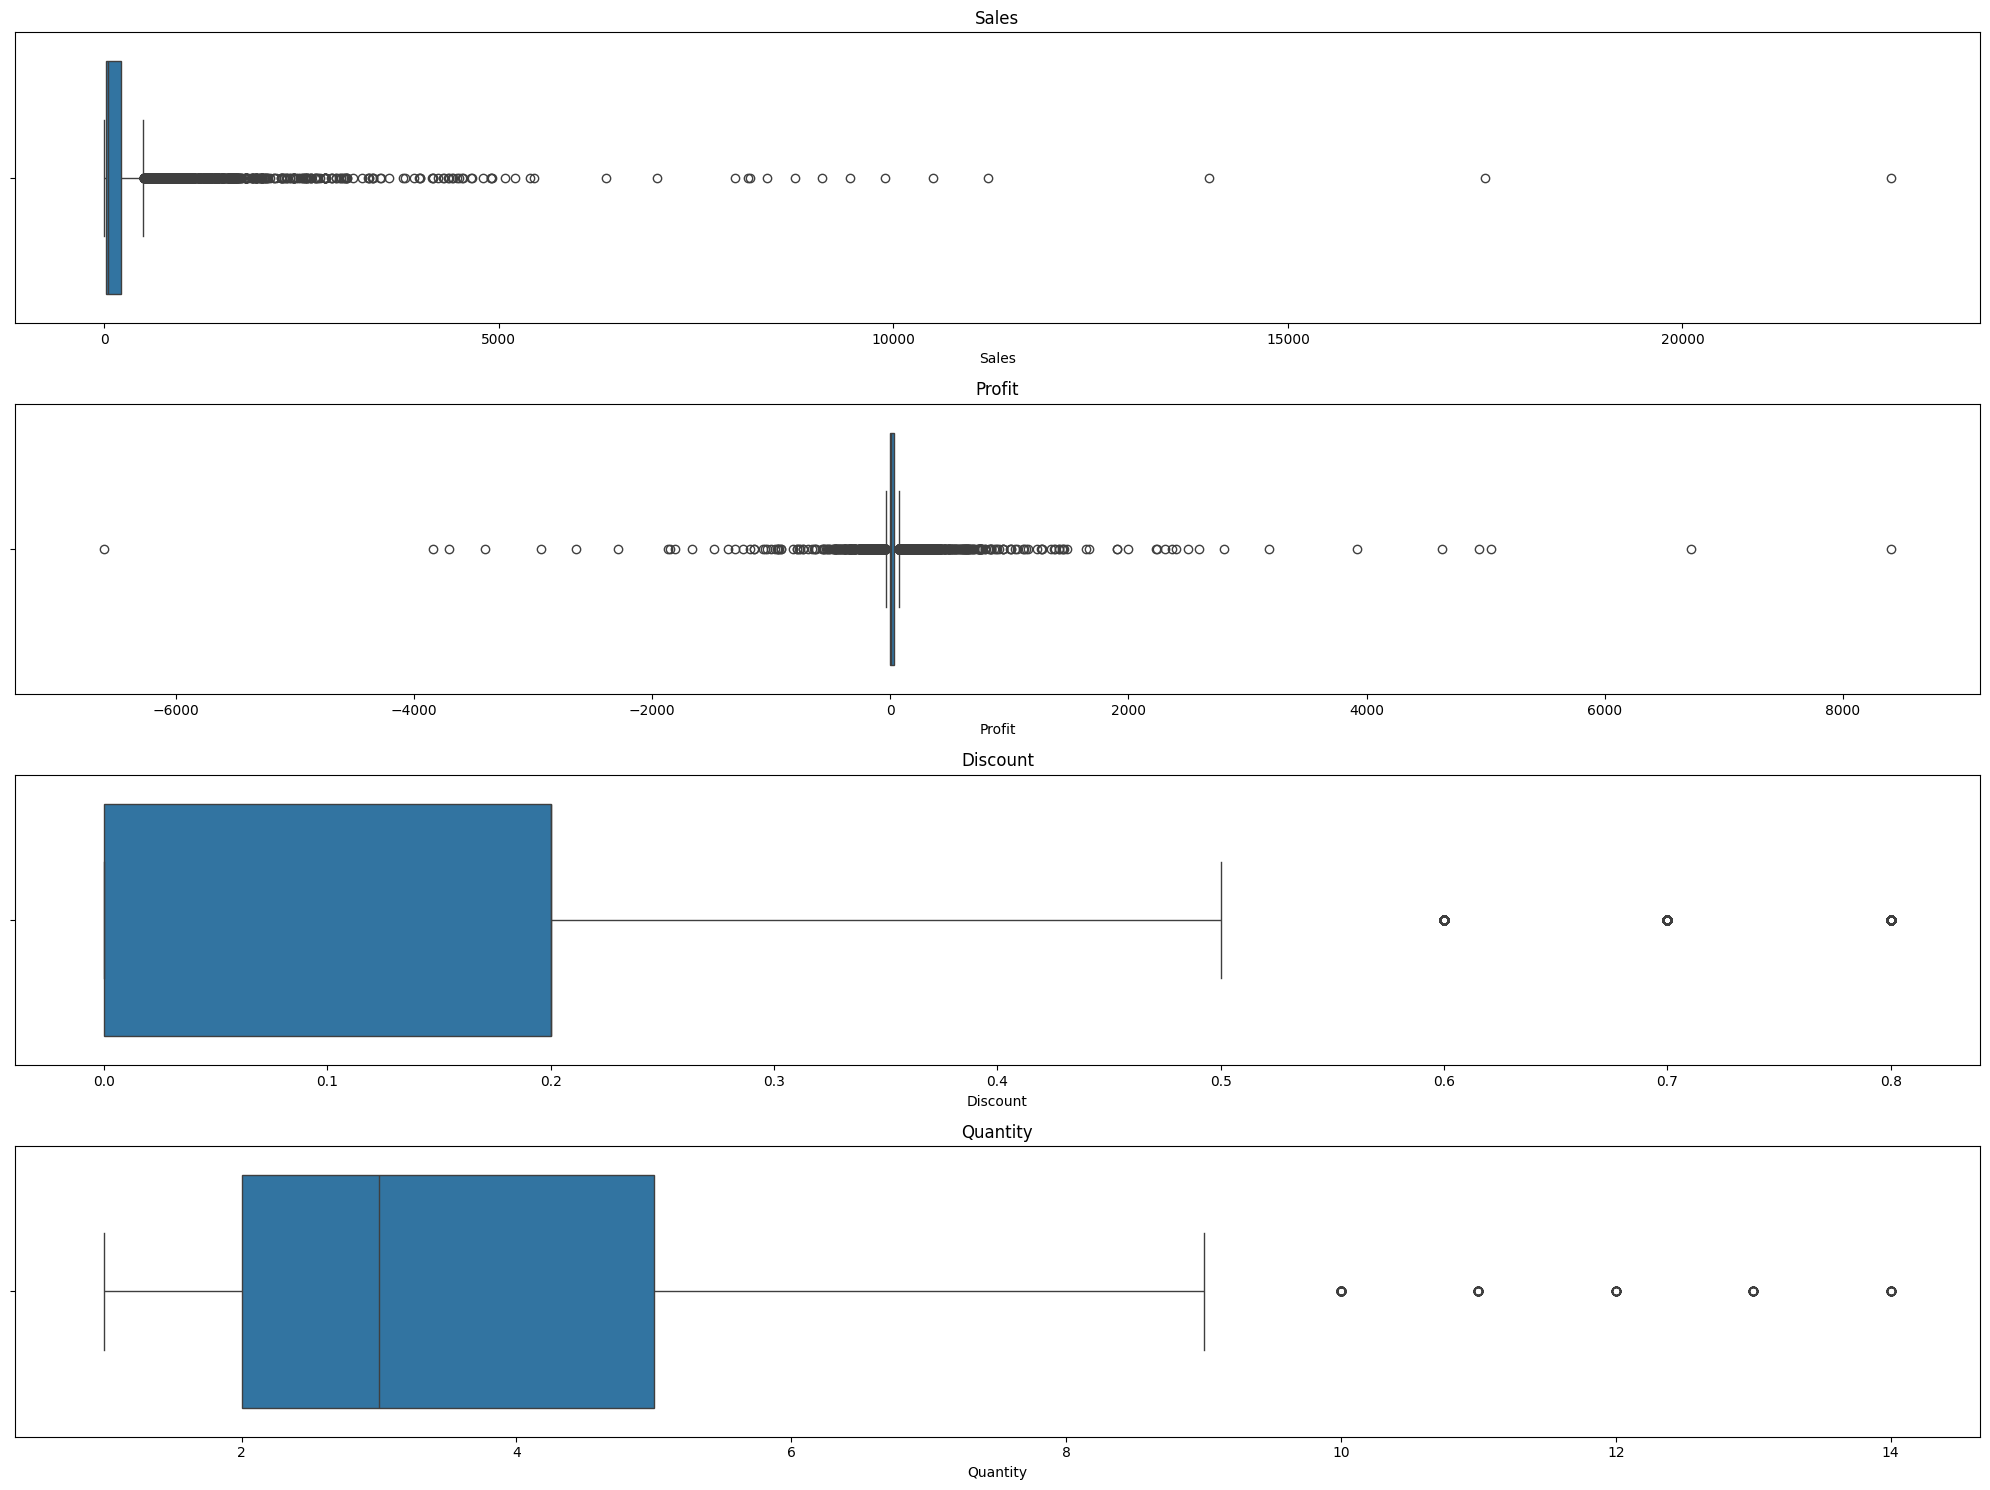

In [16]:
#Menampilkan Outliers dengan Box Plot
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
#Menampilkan data pada Sales, Discount, Profit dan Quantity
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


In [18]:
from tabulate import tabulate

Library tabulate di Python adalah tools yang membantu dapat membuat firmat dan menampilkan tabular atau stuktur data yang mudah dibaca dan terorganisir.

In [19]:
# Dictionary untuk menampilkan informasi outliers
outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # menghitung Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # menghitung fence
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # mengidentifikasi outliers
    outliers_condition = (df[column] < lower_fence) | (df[column] > upper_fence)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_fence': lower_fence,
        'upper_fence': upper_fence,
        'outliers_value': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }


# summary for outliers_summary

outliers_summary = {key: {'fence': (value['lower_fence'], value['upper_fence']), 
                          'outliers_value': value['outliers_value']} 
                    for key, value in outliers_info.items()}

# Creating DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Splitting 'bounds' into 'lower_bound' and 'upper_bound' columns
outliers_summary_df[['lower_fence', 'upper_fence']] = outliers_summary_df['fence'].apply(pd.Series)

# Dropping the original 'bounds' column
outliers_summary_df.drop('fence', axis=1, inplace=True)

# Reordering the columns for a better view
outliers_summary_df = outliers_summary_df[['lower_fence', 'upper_fence', 'outliers_value']]

# Display DataFrame as a styled table
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table




,lower_fence,upper_fence,outliers_value
Sales,-272,499,1167
Quantity,-2,10,170
Discount,-0,0,856
Profit,-40,71,1881


**RINGKASAN**

**Sales:**
| **SALES**| **Value**|
| ---------|--------- | 
|Lower Fence    | -272|
|Upper Fence    | 499 |
|Jumlah Outliers| 1167| 

Terdapat jumlah besar outlier di kolom Sales, yang menunjukkan deviasi signifikan dari kisaran nilai pada umumnya. Hal ini berarti seringnya terjadi angka penjualan yang sangat tinggi atau rendah yang jauh melampaui nilai yang diharapkan dalam kumpulan data ini.

**Quantity:**
| **Quantity**| **Value**|
| ---------|--------- | 
|Lower Fence    | -2|
|Upper Fence    | 10|
|Jumlah Outliers| 170| 

Pada kolom Quantity memiliki jumlah outliers yang kecil, disarankan contoh dimana Quantity dari barang yang dipesan mungkin sangat tinggi atau rendah dibandingkan dengan kisaran Quantity pesanan biasanya.

**Discount:**
| **Discount**| **Value**|
| ---------|--------- | 
|Lower Fence    |   0|
|Upper Fence    |   0|
|Jumlah Outliers| 856| 

Semua value mungkin dianggap outlier dalam kolom Discount karena lower fence menunjukkan 0 dan upper fence juga 0, yang menunjukkan bahwa tidak ada diskon yang berada dalam kisaran yang diharapkan (dengan asumsi nilai diskon positif).

**Profit:**
| **Profit**| **Value**|
| ---------|--------- | 
|Lower Fence    |  -40|
|Upper Fence    |   71|
|Jumlah Outliers| 1881| 

Mirip dengan Sales, Profit memiliki sejumlah besar outlier, yang menunjukkan contoh di mana Profit yang diperoleh mungkin menyimpang secara signifikan dari Profit yang biasanya diharapkan. Mungkin terdapat frekuensi tinggi margin keuntungan yang sangat rendah dan tinggi di luar batas yang ditentukan.


**KESIMPULAN**

* Sales: terdapat banyak sales yang angka penjualannya sangat tinggi atau rendah dari biasanya, ini berarti bahwa mungkin ada banyak penjualan yang sangat besar atau sangat rendah dan ini terlihat outliers berada di angka $10.000 dan lebih tinggi.

* Quantity: ada beberapa kejadian dimana jumlah item yg dipesan lebih banyak atau lebih sedikit daripada item yg biasa dipesan, untuk Quantity terdapat jumlah kecil dari outliers dan itu wajar.

* Discount: semua nilai Diskon dianggap tidak biasa karena semuanya 0. ini berarti bahwa mumgkin tidak ada diskon yang diberikan

* Profit: terdapat banyak profit yang lebih besar atau lebih kecil dari biasanya, ini berarti bahwa mungkin terdapat banyak profit yang lebih tinggi atau lebih rendah dan itu wajar untuk kondisi fluktuatif dari boxplot untuk Profit.

**Dari outliers yang ada, saya akan membiarkan itu seperti asalnya, karena saya mau menganakisa tentang kerugian di dataset dan alasan kenapa sales dengan tingkat penjualan lebih tinggi memiliki kerugian, jika saya menghapus atau menghilangkan outliers yang terdapat di $10.000 atau lebih pada kolom Sales, saya tidak bisa menganalisa tentang kondisi dan jawaban untuk Pernyataan Masalah yang saya buat**



**Data Anomaly pada Dataset**

* **Order ID & Order Date**

In [20]:
df['Order ID'].nunique()

5009

In [21]:
df_grouped = df.groupby('Order ID')['License'].unique().reset_index()
df_grouped.head()


,Order ID,License
0,AMER-2020-100090,"[4BEAB9UXKH, AVBMH39MTD]"
1,AMER-2020-100279,[NI5MITNJ98]
2,AMER-2020-100363,"[0O2MCUTMFW, 7ZEJI08M1P]"
3,AMER-2020-100762,"[9WNGMUMGIU, QLK9TG5206, V5SQA48WYZ, 5F2LX40BDP]"
4,AMER-2020-100860,[T3NURF3EZL]


In [22]:
# Grouping by 'Order ID' and getting unique 'License' values
df_grouped = df.groupby('Order ID')['License'].unique().reset_index()
df_grouped.head()

# Counting duplicated 'License' values
duplicated_licenses_count = df['License'].duplicated().sum()
print(f"Duplicated Licenses Count: {duplicated_licenses_count}")


Duplicated Licenses Count: 0


**Pola Order ID**

Order ID mengikuti pola: "AMER-2020-" diikuti dengan urutan numerik. Hal ini menunjukkan potensi sistem pemesanan berdasarkan masing-masing wilayah (AMER untuk Amerika) dan tahun 2020.

**Keberagaman pada format License Key**

Format pada License Key tampak alfanumerik, kemungkinan dihasilkan secara acak atau menurut algoritma tertentu. Beberapa tombol lebih panjang (10 karakter), sementara yang lain lebih pendek (9 karakter). Jadi tidak ada masalah diantara formatting License Key ini.

**Key Unik per Order**

Setiap order memiliki set license key unik tersendiri, yang menunjukkan pembelian individual atau alokasi individual sehingga tidak boleh ada duplikasi pada setiap License.


In [23]:
df.groupby('Order ID')['Order Date'].unique().reset_index().head()
# Grouping by 'Order ID' and getting unique 'Order Date' values


,Order ID,Order Date
0,AMER-2020-100090,[2020-07-08 00:00:00]
1,AMER-2020-100279,[2020-03-10 00:00:00]
2,AMER-2020-100363,[2020-04-08 00:00:00]
3,AMER-2020-100762,[2020-11-24 00:00:00]
4,AMER-2020-100860,[2020-03-26 00:00:00]


In [24]:
max_Date = df['Order Date'].max()

# Create a DataFrame to display the maximum date
date_info = pd.DataFrame({'Highest Date': [max_Date]})
display(date_info)





,Highest Date
0,2023-12-31


In [25]:
min_Date = df['Order Date'].min()

# Create a DataFrame to display the minimum date
date_info = pd.DataFrame({'Lowest Date': [min_Date]})
display(date_info)

,Lowest Date
0,2020-01-04


pada dataframe diatas menunjukkan bahwa tanggal terendah & tertinggi ada pada tanggal 4 Januari 2020 hingga 31 Desember 2023

In [26]:
# Group by 'Order Date' and sum the sales, then sort by the date
grouped_by_date_smallest = (
    df.groupby('Order Date')['Sales']
    .sum()
    .reset_index()
)

# Format 'Sales' as dollar values
grouped_by_date_smallest['Sales'] = grouped_by_date_smallest['Sales'].apply(lambda x: f'${x:,.2f}')

# Sort by the 'Order Date' in ascending order
grouped_by_date_smallest = grouped_by_date_smallest.sort_values(by='Order Date', ascending=True)

grouped_by_date_smallest.head()


,Order Date,Sales
0,2020-01-04,$16.45
1,2020-01-05,$288.06
2,2020-01-06,$19.54
3,2020-01-07,"$4,407.10"
4,2020-01-08,$87.16


In [27]:
grouped_by_date_highest = (
    df.groupby('Order Date')['Sales']
    .sum()
    .reset_index()
)

# Format 'Sales' as dollar values
grouped_by_date_highest['Sales'] = grouped_by_date_highest['Sales'].apply(lambda x: f'${x:,.2f}')

# Sort by the 'Order Date' in descending order
grouped_by_date_highest = grouped_by_date_highest.sort_values(by='Order Date', ascending=False)

grouped_by_date_highest.head()


,Order Date,Sales
1236,2023-12-31,$713.79
1235,2023-12-30,"$2,915.53"
1234,2023-12-29,"$1,657.35"
1233,2023-12-28,$177.64
1232,2023-12-27,$814.59


Untuk melihat perbedaan kolom Order Date dan Sales sepertinya benar bahwa Order Date terendah dan Tertinggi berada pada rentang min dan max order date pada dataset ini beserta penjualannya. Untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data

* **Product, Industry, Segment.**

In [28]:
# Group by 'Industry' and get unique 'Product' values
industry_product_df = (
    df.groupby('Industry')['Product']
    .unique()
    .reset_index()
)

industry_product_df.head()


,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneView, Data Smasher, ContactMatcher, Support, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite]"
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connector Pack, Data Smasher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Marketing Suite, Big Ol Database, Marketing Suite - Gold, Storage, Alchemy]"
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Site Analytics, OneView, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Data Smasher, Alchemy, SaaS Connector Pack - Gold]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Analytics, ContactMatcher, OneView, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Marketing Suite - Gold, Data Smasher, Support, Storage, Big Ol Database, Alchemy]"
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, SaaS Connector Pack - Gold, Site Analytics, Data Smasher, Support, Storage, Alchemy, ChatBot Plugin, Marketing Suite, Big Ol Database]"


Tabel ini mewakili berbagai industri dan produk yang terkait dengan masing-masing industri. Setiap baris mewakili suatu industri, dan kolom 'Product' berisi daftar produk yang terkait dengan setiap industri.

In [29]:
# Group by 'Segment' and get unique 'Product' values
segment_product_df = (
    df.groupby('Segment')['Product']
    .unique()
    .reset_index()
)

segment_product_df.head()


,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Site Analytics, Marketing Suite - Gold, SaaS Connector Pack, Data Smasher, ChatBot Plugin, Storage, Big Ol Database, Alchemy]"
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Analytics, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, ContactMatcher, Storage, SaaS Connector Pack - Gold, Support, Marketing Suite, Big Ol Database, Alchemy]"


Pada table ini terdapat 3 segmen yang termasuk Enterprise, SMB dan Strategic yang berisi daftar produk yang terkait dengan setiap segmen. tidak terdapat data anomali pada kolom-kolom ini, untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data.

* **Country, Region & Subregion**

In [30]:
country_region_df = (
    df.groupby('Region')['Country']
    .unique()
    .reset_index()
)

country_region_df.head()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


Dari tabel diatas, bisa dilihat bahwa ada 3 region terdiri atas AMER,APJ dan EMEA (America Region, Asia-Pacific & Japan region DAN Africa, Middle East & Europe Region). Negara-negara yang tercantum dalam setiap kategori tampaknya sangat cocok dengan kawasan ini berdasarkan lokasi kontinentalnya

In [31]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


Pengkategorian ini lebih detail dibandingkan menggunakan Region, dari tabel ini kita dapat melihat setiap Country berada di subregion yang benar.
Tampaknya terperinci dan mencakup berbagai lokasi geografis dalam divisi benua yang lebih luas.

Penggunaan subregion cukup berguna dalam menganalisis dan mensegmentasi pasar, memahami perbedaan regional dalam praktik bisnis, dan untuk strategi pemasaran yang ditargetkan.

In [32]:
# Simplify the code by using a single line to perform the same operation
df.groupby('Subregion')['City'].count().reset_index()


,Subregion,City
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


Dataframe ini menunjukkan jumlah setiap kota pada subregion.

In [33]:
df.groupby('Country')['City'].unique().reset_index()


,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


Tabel ini mewakili kota-kota besar di setiap negara. Tabel ini memberikan gambaran yang bagus mengenai pusat perkotaan di seluruh dunia dan dari tabel ini tampaknya pasangan kota dan negara sudah berada pada pasangan yang tepat.

**Mispelling pada City**


In [34]:
np.sort(df['City'].unique())

array(['Abu Dhabi', 'Adelaide', 'Aichi', 'Alexandria', 'Alicante',
       'Amsterdam', 'Anaheim', 'Ankara', 'Antofagasta', 'Antwerp',
       'Arlington', 'Athens', 'Atlanta', 'Auckland', 'Aurora', 'Austin',
       'Baltimore', 'Bandung', 'Bangalore', 'Barcelona', 'Bari',
       'Beijing', 'Belfast', 'Belo Horizonte', 'Berlin', 'Birmingham',
       'Bogotá', 'Bologna', 'Brasília', 'Brescia', 'Brighton', 'Brisbane',
       'Bristol', 'Brno', 'Brussels', 'Buenos Aires', 'Buffalo',
       'Burlington', 'Bursa', 'Busan', 'Cabo San Lucas', 'Cairo',
       'Calgary', 'Cali', 'Canberra', 'Cancun', 'Cape Town', 'Cardiff',
       'Catania', 'Charlotte', 'Chengdu', 'Chennai', 'Chiba', 'Chicago',
       'Cleveland', 'Clinton', 'Cologne', 'Columbia', 'Columbus',
       'Copenhagen', 'Cork', 'Córdoba', 'Daegu', 'Dallas', 'Davao City',
       'Delhi', 'Denver', 'Detroit', 'Dhahran', 'Doha', 'Donetsk',
       'Dresden', 'Dubai', 'Dublin', 'Edinburgh', 'Espoo', 'Everett',
       'Florence', 'Fort Worth

Tidak terdapat misspeling pada kolom City namun terdapat beberapa potensi misspeling pada list di kolom City. Kita dapat menyimpulkan bahwa sebagian besar nama tampaknya dieja dengan benar untuk kota atau wilayahnya masing-masing

* **Sales**

In [35]:
print(f"Lowest Sales = {df['Sales'].min()}")

lowest_sales_df = df[df['Sales'] == df['Sales'].min()]
display(lowest_sales_df)


Lowest Sales = 0.444


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
4101,APJ-2023-102288,2023-06-20,Pippa Brown,Japan,Tokyo,APJ,JAPN,Volkswagen,1046,Manufacturing,SMB,OneView,3X69FF4G6O,0.444,1,0.8,-1.11,-250.0


In [36]:
print(f"Highest Sales = {df['Sales'].max()}")

highest_sales_df = df[df['Sales'] == df['Sales'].max()]
display(highest_sales_df)



Highest Sales = 22638.48


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
2697,EMEA-2020-145317,2020-03-18,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.48,6,0.5,-1811.0784,-8.0


Pada Sales terkecil tidak ada nilai negatifnya dan pada Sales Tertinggi juga tidak ada nilai negatifnya. Dapat disimpulkan bahwa tidak terdapat data anomali pada kolom tersebut Sales.

In [37]:
grouped_by_sales_Smallest = (
    df.groupby('Sales')
    .agg({'Profit': 'sum', 'Quantity': 'sum'})
    .sort_values(by='Sales', ascending=True)
    .reset_index()
)

total_profit = grouped_by_sales_Smallest['Profit'].sum()

# Formatting 'Sales' as dollar values
grouped_by_sales_Smallest['Sales'] = grouped_by_sales_Smallest['Sales'].apply(lambda x: f'${x:,.2f}')
grouped_by_sales_Smallest['Profit'] = ((grouped_by_sales_Smallest['Profit'] / total_profit) * 100).round(2).astype(str) + '%'
grouped_by_sales_Smallest['Quantity'] = grouped_by_sales_Smallest['Quantity'].apply(lambda x: f'{x} pcs')

grouped_by_sales_Smallest.head()


,Sales,Profit,Quantity
0,$0.44,-0.0%,1 pcs
1,$0.56,-0.0%,1 pcs
2,$0.84,-0.0%,1 pcs
3,$0.85,-0.0%,1 pcs
4,$0.88,-0.0%,1 pcs


Untuk melihat selisih 3 kolom yang terdiri dari Sales, Profit dan Quantity sudah benar bahwa bagian Sales mempunyai Profit 0 karena angka Sales rendah sehingga dapat disimpulkan tidak ada anomali. Untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data.

In [38]:
grouped_by_sales_Largest = df.groupby('Sales').agg({'Profit': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()

total_profit = grouped_by_sales_Largest['Profit'].sum()


grouped_by_sales_Largest['Sales'] = grouped_by_sales_Largest['Sales'].apply(lambda x: f'${x:,.2f}')
grouped_by_sales_Largest['Profit'] = ((grouped_by_sales_Largest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_sales_Largest['Quantity'] = grouped_by_sales_Largest['Quantity'].apply(lambda x: f'{x} pcs')

grouped_by_sales_Largest.head()

,Sales,Profit,Quantity
0,"$22,638.48",-0.63%,6 pcs
1,"$17,499.95",2.93%,5 pcs
2,"$13,999.96",2.35%,4 pcs
3,"$11,199.97",1.37%,4 pcs
4,"$10,499.97",1.76%,3 pcs


Untuk melihat perbedaan 3 kolom yang terdiri dari Sales, Profit, Quantity sepertinya ada anomali karena sebagian besar penjualan memiliki laba negatif mungkin karena beberapa faktor seperti biaya produksi yang tinggi atau lain-lain. Untuk penjelasan lebih lanjut akan dijelaskan pada Bagian Analisis Data.

* **Discount**

In [39]:
# Simplify the code to display the minimum discount value formatted as a percentage
min_discount = df['Discount'].min()
discount_info = pd.DataFrame({'Lowest discount': [min_discount * 100]})
discount_info['Lowest discount'] = discount_info['Lowest discount'].round(2).astype(str) + '%'
display(discount_info)


,Lowest discount
0,0.0%


In [40]:
max_discount = df['Discount'].max() * 100  # Converting the maximum discount to a percentage
discount_info = pd.DataFrame({'Highest discount': [max_discount]})
discount_info['Highest discount'] = discount_info['Highest discount'].round(2).astype(str) + '%'

display(discount_info)



,Highest discount
0,80.0%


Pada bagian Smallest Discount tidak terdapat negatif value dan pada Highest Discount juga tidak terdapat negatif value, bisa disimpulkan bahwa tidak terdapat data anomali pada kolom ini. 

In [41]:
# Grouping by 'Discount' and aggregating 'Profit', 'Quantity', and 'Sales' columns
grouped_by_discount_Largest = df.groupby('Discount').agg({'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Discount', ascending=False).reset_index()

total_profit = grouped_by_discount_Largest['Profit'].sum()

# Formatting 'Sales' as dollar values
grouped_by_discount_Largest['Sales'] = grouped_by_discount_Largest['Sales'].apply(lambda x: f'${x:,.3f}')
grouped_by_discount_Largest['Profit'] = ((grouped_by_discount_Largest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_discount_Largest['Quantity'] = grouped_by_discount_Largest['Quantity'].apply(lambda x: f'{x} pcs')
grouped_by_discount_Largest['Discount'] = (grouped_by_discount_Largest['Discount'] * 100).round(2).astype(str)+'%'

grouped_by_discount_Largest.head()




,Discount,Profit,Quantity,Sales
0,80.0%,-10.66%,1188 pcs,"$16,963.756"
1,70.0%,-13.99%,1660 pcs,"$40,620.282"
2,60.0%,-2.08%,501 pcs,"$6,644.700"
3,50.0%,-7.16%,241 pcs,"$58,918.540"
4,45.0%,-0.87%,45 pcs,"$5,484.974"


Untuk melihat selisih pada 4 kolom yang terdiri dari Discount, Sales, Profit, Quantity sudah benar bahwa pada bagian Discount tidak ada anomali karena dengan Profit negatif. Untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data.

In [42]:
# Grouping by 'Discount' and aggregating 'Profit', 'Quantity', and 'Sales' columns
grouped_by_discount_Smallest = df.groupby('Discount').agg({'Profit': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Discount', ascending=True).reset_index()

total_profit = grouped_by_discount_Smallest['Profit'].sum()

# Formatting 'Sales' as dollar values
grouped_by_discount_Smallest['Sales'] = grouped_by_discount_Smallest['Sales'].apply(lambda x: f'${x:,.3f}')
grouped_by_discount_Smallest['Profit'] = ((grouped_by_discount_Smallest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_discount_Smallest['Quantity'] = grouped_by_discount_Smallest['Quantity'].apply(lambda x: f'{x} pcs')
grouped_by_discount_Smallest['Discount'] = (grouped_by_discount_Smallest['Discount'] * 100).round(2).astype(str)+'%'

grouped_by_discount_Smallest.head()



,Discount,Profit,Quantity,Sales
0,0.0%,112.08%,18267 pcs,"$1,087,908.470"
1,10.0%,3.15%,373 pcs,"$54,369.351"
2,15.0%,0.5%,198 pcs,"$27,558.521"
3,20.0%,31.54%,13660 pcs,"$764,594.368"
4,30.0%,-3.62%,849 pcs,"$103,226.655"


Untuk melihat selisih pada 4 Kolom yang terdiri dari Discount, Sales, Profit dan Quantity sudah benar bahwa pada bagian Discount tidak terdapat anomali karena dengan discount 0% memiliki manfaat porfit tertinggi bagi Profit perusahaan dan juga dengan Quantity terjual tertinggi. Untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data.

* **Profit**

In [43]:
# Grouping by 'Discount' and aggregating 'Profit', 'Quantity', and 'Sales' columns
grouped_by_profit_Smallest = df.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=True).reset_index()

total_profit = grouped_by_profit_Smallest['Profit'].sum()

# Formatting 'Sales' as dollar values
grouped_by_profit_Smallest['Sales'] = grouped_by_profit_Smallest['Sales'].apply(lambda x: f'${x:,.3f}')
grouped_by_profit_Smallest['Profit'] = ((grouped_by_profit_Smallest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_profit_Smallest['Quantity'] = grouped_by_profit_Smallest['Quantity'].apply(lambda x: f'{x} pcs')
grouped_by_profit_Smallest['Discount'] = (grouped_by_profit_Smallest['Discount'] * 100).round(2).astype(str)+'%'

grouped_by_profit_Smallest.head()

,Profit,Discount,Quantity,Sales
0,-2.97%,70.0%,5 pcs,"$4,499.985"
1,-1.73%,50.0%,4 pcs,"$7,999.980"
2,-1.67%,80.0%,8 pcs,"$2,177.584"
3,-1.53%,70.0%,5 pcs,"$2,549.985"
4,-1.32%,80.0%,5 pcs,"$1,889.990"


Jika dilihat selisih 4 kolom yang terdiri dari Profit, Sales, Discount & Quantity maka sudah benar bahwa pada bagian Profit terdapat nilai negatif artinya perusahaan kesulitan dalam memperoleh keuntungan dari Sales, Quantity yang terjual, dan pengaruhnya. diskon jadi tidak ada anomali. Untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data.

In [44]:
# Grouping by 'Discount' and aggregating 'Profit', 'Quantity', and 'Sales' columns
grouped_by_profit_Largest = df.groupby('Profit').agg({'Discount': 'sum', 'Quantity': 'sum', 'Sales': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()

total_profit = grouped_by_profit_Largest['Profit'].sum()

# Formatting 'Sales' as dollar values
grouped_by_profit_Largest['Sales'] = grouped_by_profit_Largest['Sales'].apply(lambda x: f'${x:,.3f}')
grouped_by_profit_Largest['Profit'] = ((grouped_by_profit_Largest['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
grouped_by_profit_Largest['Quantity'] = grouped_by_profit_Largest['Quantity'].apply(lambda x: f'{x} pcs')
grouped_by_profit_Largest['Discount'] = (grouped_by_profit_Largest['Discount'] * 100).round(2).astype(str)+'%'

grouped_by_profit_Largest.head()


,Profit,Discount,Quantity,Sales
0,3.78%,0.0%,5 pcs,"$17,499.950"
1,3.02%,0.0%,4 pcs,"$13,999.960"
2,2.27%,0.0%,3 pcs,"$10,499.970"
3,2.23%,0.0%,13 pcs,"$9,892.740"
4,2.08%,0.0%,5 pcs,"$9,449.950"


Untuk melihat selisih 4 kolom yang terdiri dari Profit, Sales, Discount, Quantity sudah benar bagian profit yang mendapatkan profit dimana saya ubah dari $ menjadi persentase untuk melihat persentase Profit dari Sales, Quantity terjual, dan pengaruhnya pada discount sehingga tidak ada anomali. Untuk penjelasan lebih lanjut akan dijelaskan pada bagian Analisis Data.

In [45]:
# Calculate the minimum quantity
min_quantity = df['Quantity'].min() 

# Prepare the DataFrame
quantity_info = pd.DataFrame({'Minimum quantity': [min_quantity]})
quantity_info['Minimum quantity'] = quantity_info['Minimum quantity'].astype(int).astype(str) + ' pcs'

display(quantity_info)

,Minimum quantity
0,1 pcs


In [46]:
# Calculate the maximum quantity
max_quantity = df['Quantity'].max() 

# Prepare the DataFrame
quantity_info = pd.DataFrame({'Highest quantity': [max_quantity]})
quantity_info['Highest quantity'] = quantity_info['Highest quantity'].astype(int).astype(str) + ' pcs'

display(quantity_info)



,Highest quantity
0,14 pcs


Sudah benar besaran terkecil tidak ada nilai negatifnya dan besaran tertinggi juga tidak ada nilai negatifnya. Dapat disimpulkan bahwa tidak ada anomali pada kolom ini.

In [47]:

# Grouping by Quantity and getting unique Discount values
grouped_by_quantity = df.groupby('Quantity')['Discount'].apply(lambda x: list(x)).reset_index()

# Merging with the existing grouped data
grouped_by_quantity_Largest = grouped_by_quantity.merge(
    df.groupby('Quantity').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index(),
    on='Quantity'
)

# Calculating the total profit
total_profit = grouped_by_quantity_Largest['Profit'].sum()

# Formatting 'Sales' as dollar values and calculating percentage for 'Profit'
grouped_by_quantity_Largest['Sales'] = grouped_by_quantity_Largest['Sales'].apply(lambda x: f'${x:,.3f}')
grouped_by_quantity_Largest['Profit'] = ((grouped_by_quantity_Largest['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Formatting Discount as a list of percentages
grouped_by_quantity_Largest['Discount Rates'] = grouped_by_quantity_Largest['Discount'].apply(lambda x: [f"{rate * 100}%" for rate in x])


Comparison_by_Quantity = pd.DataFrame({
    'Quantity': grouped_by_quantity_Largest['Quantity'],
    'Discount Rates': grouped_by_quantity_Largest['Discount Rates'],
    'Sales': grouped_by_quantity_Largest['Sales'],
    'Profit Percentage': grouped_by_quantity_Largest['Profit']
})

Comparison_by_Quantity


,Quantity,Discount Rates,Sales,Profit Percentage
0,1,"[0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 70.0%, 20.0%, 20.0%, 70.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 20.0%, 10.0%, 0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 60.0%, 0.0%, 20.0%, 0.0%, 0.0%, 50.0%, 0.0%, 0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 50.0%, 0.0%, 0.0%, 20.0%, 0.0%, 50.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, ...]","$53,251.935",2.6%
1,2,"[0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 30.0%, 20.0%, 70.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 70.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 80.0%, 20.0%, 0.0%, 0.0%, 20.0%, 70.0%, 50.0%, 80.0%, 0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 20.0%, 20.0%, 45.0%, 70.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 80.0%, 0.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 20.0%, 40.0%, 70.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 70.0%, 20.0%, 70.0%, 40.0%, ...]","$289,091.480",13.42%
2,3,"[0.0%, 20.0%, 20.0%, 20.0%, 80.0%, 20.0%, 0.0%, 0.0%, 20.0%, 20.0%, 32.0%, 30.0%, 0.0%, 0.0%, 0.0%, 80.0%, 60.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 20.0%, 80.0%, 20.0%, 70.0%, 20.0%, 0.0%, 0.0%, 30.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 40.0%, 20.0%, 45.0%, 20.0%, 20.0%, 60.0%, 60.0%, 0.0%, 0.0%, 40.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 50.0%, 20.0%, 20.0%, 20.0%, 0.0%, 50.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 40.0%, 70.0%, 20.0%, 20.0%, 0.0%, 10.0%, 20.0%, 80.0%, 20.0%, 20.0%, 45.0%, 20.0%, 0.0%, 80.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 30.0%, 10.0%, 0.0%, 0.0%, ...]","$422,060.601",19.91%
3,4,"[0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 80.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 70.0%, 20.0%, 70.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 30.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 80.0%, 70.0%, 20.0%, 0.0%, 32.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 60.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 20.0%, 20.0%, 40.0%, 70.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 50.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 0.0%, 45.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, ...]","$323,670.994",15.44%
4,5,"[45.0%, 0.0%, 80.0%, 60.0%, 0.0%, 0.0%, 10.0%, 30.0%, 60.0%, 0.0%, 20.0%, 40.0%, 0.0%, 20.0%, 0.0%, 80.0%, 20.0%, 0.0%, 0.0%, 50.0%, 0.0%, 20.0%, 60.0%, 50.0%, 0.0%, 20.0%, 20.0%, 80.0%, 20.0%, 20.0%, 20.0%, 20.0%, 70.0%, 0.0%, 0.0%, 20.0%, 20.0%, 70.0%, 0.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 20.0%, 70.0%, 0.0%, 0.0%, 0.0%, 15.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 20.0%, 80.0%, 10.0%, 20.0%, 20.0%, 0.0%, 20.0%, 30.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 20.0%, 20.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 70.0%, 20.0%, 20.0%, 0.0%, 30.0%, 70.0%, 20.0%, 10.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, ...]","$415,661.697",17.29%
5,6,"[20.0%, 0.0%, 20.0%, 70.0%, 0.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 50.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 0.0%, 20.0%, 70.0%, 20.0%, 20.0%, 20.0%, 20.0%, 0.0%, 50.0%, 0.0%, 20.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 20.0%, 0.0%, 0.0%, 0.0%, 0.0%, 20.0%, 70.0%, 0.0%, 0.0%, 70.0%, 20.0%, 20.0%, 20.0%, 10.0%, 20.0%, 0.0%, 20.0%, 20.0%, 0.0%, 20.0%, 0.0%, 20.0%, 0.0%, 0.0%, 70.0%, 80.0%, 20.0%, 70.0%, 0.0%, 0.0%, 20.0%, 20.0%, 0.0%

Untuk melihat perbedaan 4 kolom yang terdiri dari Quantity Sales, Discount, Profit sudah benar bahwa pada bagian quantity tidak ada discount negatif dengan kisaran 0-80% dengan berbagai Sales dan Profits. Untuk penjelasan lebih lanjut akan diberikan jelaskan di bagian Analisis Data.

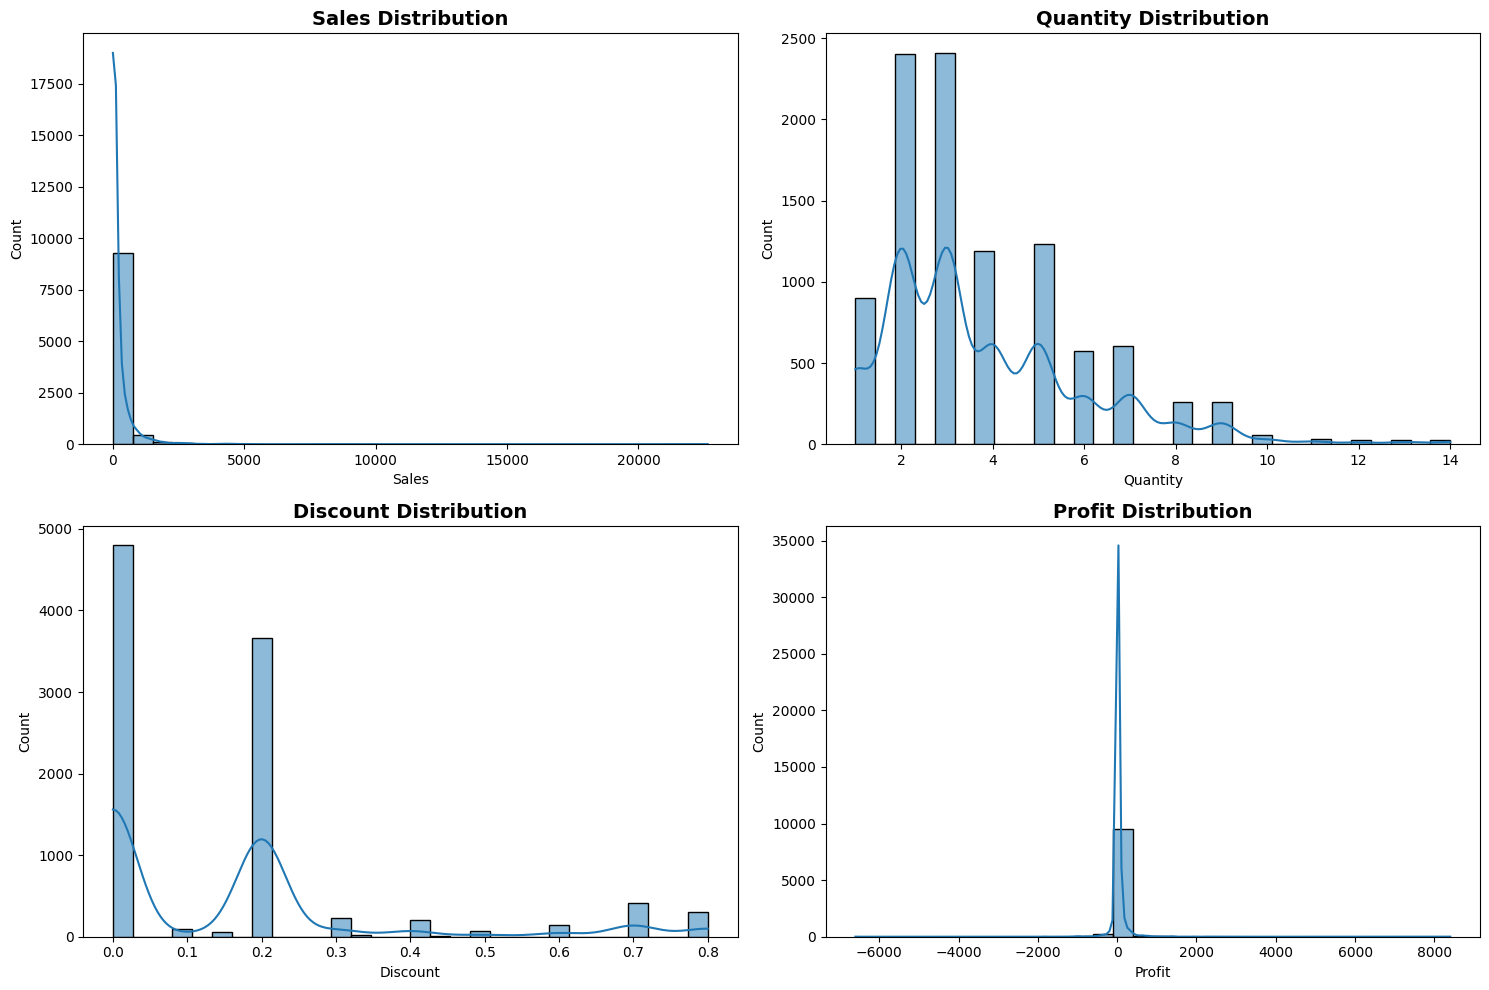

In [48]:
# Analyzing distribution of numerical data consist of Sales, Discount, Quantity, and Profit

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Discount Distribution
sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Discount Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

**Ringkasan Normalitas dan Distribusi Data:**

* 1. Sales:

    Sebagian besar transaksi memiliki Sales values yang relatif rendah, sementara beberapa transaksi menunjukkan Sales values yang sangat tinggi. Distribusi ini sangat condong ke kanan (Right Skewed) sehingga **Data penjualan tidak normal**

* 2. Quantity:

    Mayoritas transaksi melibatkan pembelian dalam jumlah kecil, dan beberapa transaksi melibatkan Quantity pembelian yang sangat besar. Distribusi ini juga condong ke kanan (Right Skewed) sehingga **data kuantitas tidak normal**

* 3. Discount:

    Sebagian besar transaksi tidak menerapkan discount apa pun, kita dapat melihat discount 0% memiliki distribusi tertinggi, dan transaksi lainnya biasanya rendah dalam menerapkan discount pada produknya. **Data diskon tidak normal**

* 4. Profit:

    Profit menunjukkan distribusi yang relatif lebih simetris dibandingkan kolom lainnya, namun masih terdapat beberapa nilai ekstrim pada kedua sisi dengan nilai kurtosis > 3 leptokurtik. **Data keuntungan tidak normal**

In [49]:
df.to_excel('Updated SaaS-Sales-Data.xlsx', index=False)

## Data Analisis dan Visualisasi

Setelah proses pembersihan data, akan dilakukan analisis untuk mengetahui faktor apa saja yang mempengaruhi profitabilitas negatif dalam penjualan produk SaaS di AWS dan memberikan rekomendasi untuk meningkatkan profitabilitas produk tersebut berdasarkan **kinerja penjualan perusahaan, segmentasi pelanggan, dan analisis pasar**

## **Spesifikasi Produk yang berkontribusi pada Profit Negatif**


In [50]:
# Grouping by 'Product' and calculating the percentage of profit for each product
profit_percent = df.groupby("Product")[["Profit"]].sum()
total_profit = profit_percent["Profit"].sum()
profit_percent["Profit_Percentage"] = (profit_percent["Profit"] / total_profit) * 100

# Rounding to 2 decimal places and adding '%' symbol for Profit_Percentage
profit_percent["Profit_Percentage"] = profit_percent["Profit_Percentage"].round(2).astype(str) + '%'

# Formatting Profit column to include '$'
profit_percent["Profit"] = profit_percent["Profit"].map('${:,.2f}'.format)

# Sorting by Profit Percentage in descending order
profit_percent = profit_percent.sort_values("Profit_Percentage", ascending=False)

profit_percent

,Profit,Profit_Percentage
Product,,
Marketing Suite - Gold,"$21,278.83",7.43%
OneView,"$18,138.01",6.33%
SaaS Connector Pack,"$13,059.14",4.56%
ContactMatcher,"$12,496.28",4.36%
SaaS Connector Pack - Gold,"$6,964.18",2.43%
ChatBot Plugin,"$6,527.79",2.28%
Alchemy,"$55,617.82",19.42%
Site Analytics,"$44,515.73",15.54%
Data Smasher,"$41,936.64",14.64%


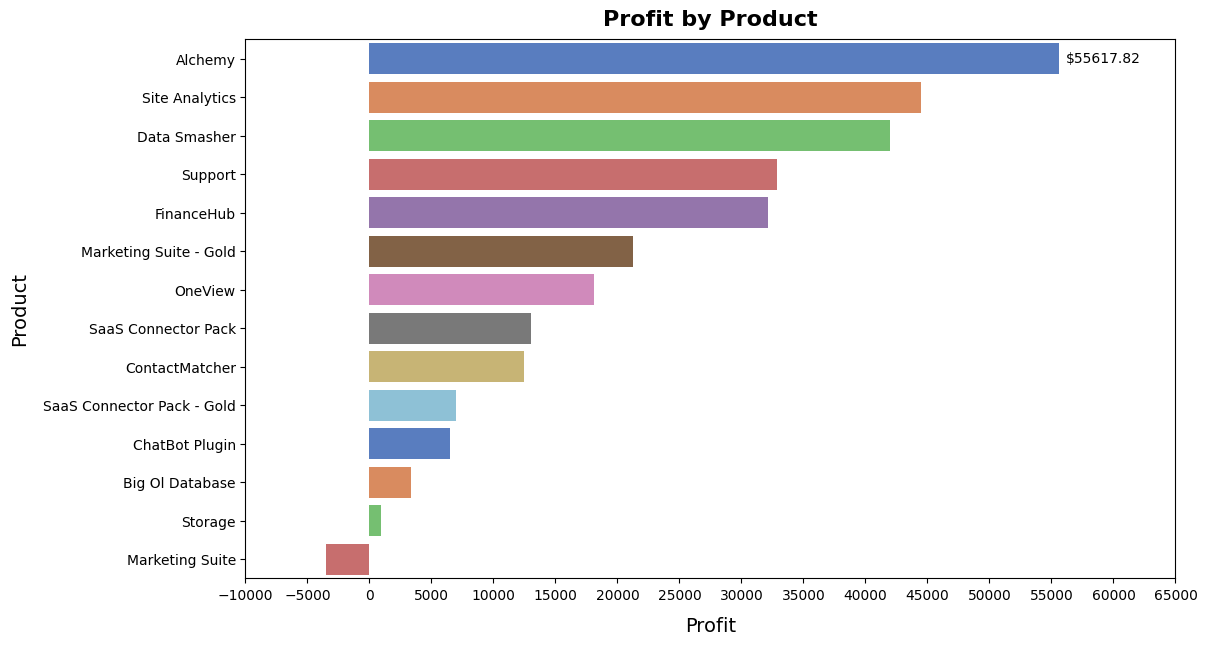

In [51]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df,
    y="Product",
    x="Profit",
    ci=0,
    palette="muted",  
    estimator="sum",
    order=df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)
container = ax.containers[0]
profit_values = [f'${x:.2f}' for x in container.datavalues]
ax.bar_label(container, labels=profit_values, padding=5)
plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()


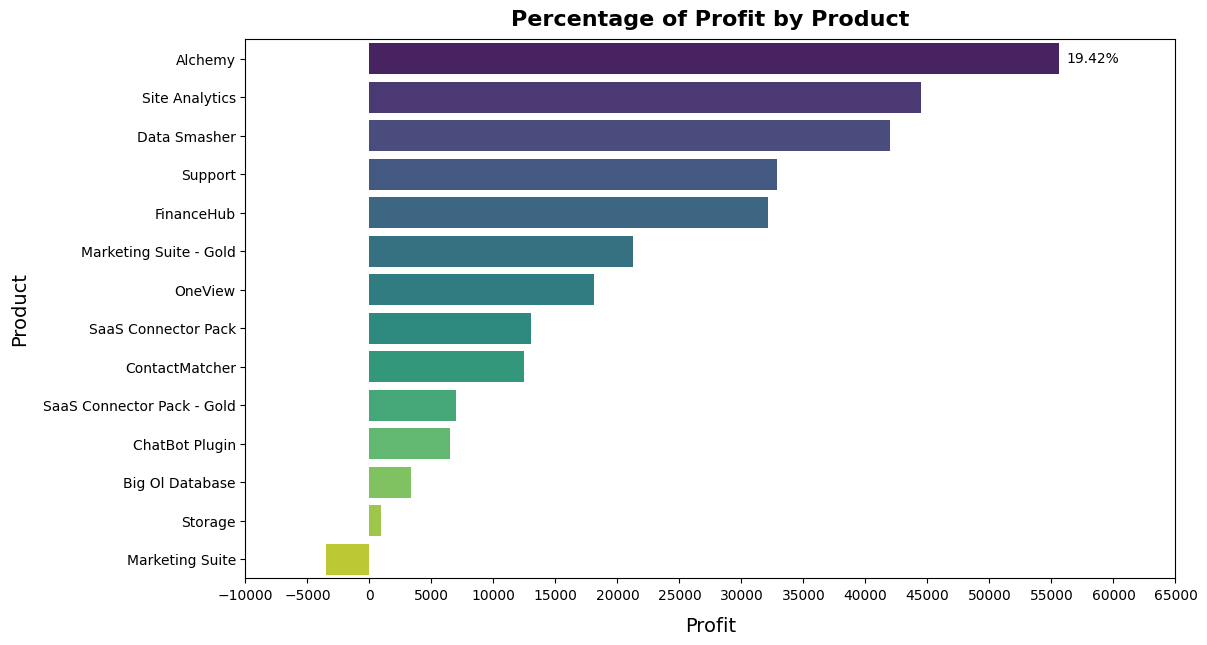

In [52]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df,
    y="Product",
    x="Profit",
    ci=0,
    palette="viridis",
    estimator="sum",
    order=df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)
container = ax.containers[0]

# Calculate profit percentages and format as string with '%' symbol
profit_percentages = [(x / df['Profit'].sum() * 100).round(2) for x in container.datavalues]
profit_percentages_str = [f'{x}%' for x in profit_percentages]

ax.bar_label(container, labels=profit_percentages_str, padding=5)
plt.title("Percentage of Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()

# **Insight**

**Produk yang menghasilkan Profit**
* Produk dengan kinerja terbaik dalam hal Profit meliputi:
    * Alchemy
    * Site Analytics
    * Data Smasher
    * Support
    * FinanceHub
    * Marketing Suite-Gold
    * OneView
    
Produk-produk ini secara kolektif memberikan kontribusi yang signifikan terhadap keseluruhan Profit, dengan Alchemy, Site Analytics, dan Data Smasher menjadi kontributor tertinggi.

**Produk yang menghasilkan Negatif Profit**
* Marketing Suite menunjukkan presentasi profit negatif, yang menunjukkan bahwa ini mengalami kerugian.

Produk ini berdampak negatif terhadap profitabilitas lini produk perusahaan secara keseluruhan.

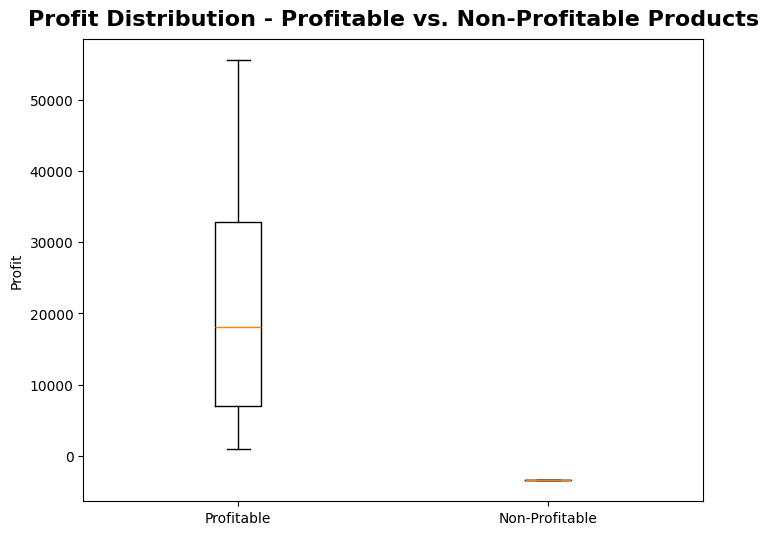

In [53]:
# Group data by 'Product' and calculate total profit for each product
product_profit = df.groupby('Product')['Profit'].sum().reset_index()

# Categorize products as profitable or non-profitable based on profit values
threshold = 0  # Define a threshold for positive or negative profit
product_profit['Profitable'] = product_profit['Profit'] > threshold

# Separate profitable and non-profitable products
profitable_products = product_profit[product_profit['Profitable'] == True]
non_profitable_products = product_profit[product_profit['Profitable'] == False]

# Calculate summary statistics for profitable and non-profitable products
profitable_stats = profitable_products['Profit'].describe()
non_profitable_stats = non_profitable_products['Profit'].describe()

# Visualization (example: box plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot([profitable_products['Profit'], non_profitable_products['Profit']], tick_labels=['Profitable', 'Non-Profitable'])
plt.title('Profit Distribution - Profitable vs. Non-Profitable Products', size=16, pad=10, fontweight='bold')
plt.ylabel('Profit')
plt.show()


# **Insight**

* Profitable vs Non-Profitable Products: Grafik di atas membandingkan distribusi profit antara Profitable dan Non-Profitable Produk.

* Profitable Products: Produk yang menguntungkan memiliki kisaran Profits yang luas, dengan median yang jauh lebih tinggi dibandingkan produk yang tidak menguntungkan. Keuntungan dari produk ini berkisar hingga $50.000. Sebagian besar distribusi produk yang menguntungkan berada pada $8.000 - $30.000 

* Non-Profitable Products: Produk yang tidak menguntungkan nampaknya tidak menghasilkan keuntungan. Plot kotak untuk produk-produk ini diwakili oleh garis horizontal kecil, yang menunjukkan keuntungan sangat rendah atau tidak sama sekali.

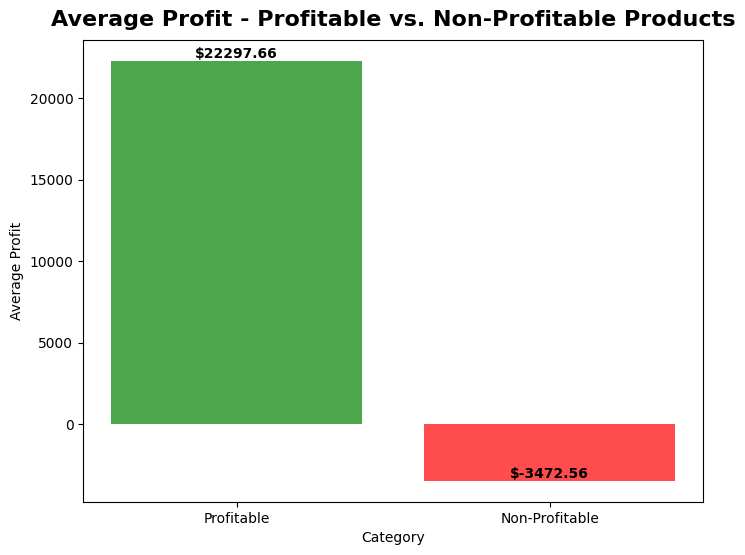

In [54]:

profitable_mean = profitable_stats['mean']
non_profitable_mean = non_profitable_stats['mean']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Profitable', 'Non-Profitable'], [profitable_mean, non_profitable_mean],
               color=['green', 'red'], alpha=0.7)

plt.title('Average Profit - Profitable vs. Non-Profitable Products', size=16, pad=10, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Average Profit')

# Adding annotations with dollar signs to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}',
             ha='center', va='bottom', fontweight='bold', color='black')

plt.show()

# **Insight**

1. Profitable vs Non-Profitable Products: Grafik di atas membandingkan rata-rata keuntungan dari Profitable Produk dan Non-Profitable Produk.

2. Profitable Products: Profitable products mempunyai rata-rata keuntungan sebesar $22,297.66.

3. Non-Profitable Products: Non-profitable products menghasilkan kerugian rata-rata $3,472.56.

Analisis ini menunjukkan bahwa terdapat perbedaan yang signifikan dalam rata-rata keuntungan antara produk yang menguntungkan dan tidak menguntungkan.


# **Negatif Profit Values**

In [55]:
df_msuite = df[df["Product"] == "Marketing Suite"]

# Display the updated DataFrame
df_msuite.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50


Tren penjualan mengacu pada keseluruhan pergerakan angka penjualan selama periode waktu tertentu, baik meningkat, menurun, atau tetap stabil. Menganalisis tren penjualan membantu memahami kinerja produk, layanan, atau bisnis dari waktu ke waktu.

Alasan mengapa saya menggunakan median untuk analisis data ini (karena tidak mempengaruhi outlier dan dalam proses pembersihan saya tidak menghilangkan outlier untuk memeriksa keuntungan negatif)

1. Resistensi Outlier: Median adalah statistik kuat yang tidak terpengaruh oleh outlier atau nilai ekstrim. Sebaliknya, mean sensitif terhadap outlier. Jika data penjualan Anda memiliki nilai ekstrem atau outlier, median akan memberikan ukuran kecenderungan terpusat yang lebih baik.

2. Data yang Miring: Jika data Anda miring, median sering kali merupakan ukuran tendensi sentral yang lebih baik daripada mean. Rata-rata dapat ditarik ke arah kemiringan, sedangkan median tidak.

3. Interpretabilitas: Median mewakili titik tengah data, artinya separuh observasi berada di atasnya dan separuh lagi di bawah. Hal ini terkadang lebih intuitif dan bermakna, terutama ketika berhubungan dengan kuantitas seperti penjualan.

### **Sales Per Bulan**

In [56]:
df_msuite = df_msuite.copy()
# Convert 'Order Date' to datetime if it's not already in datetime format
df_msuite['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting month and year
df_msuite['Order Month'] = df_msuite['Order Date'].dt.to_period('M')
df_msuite['Order Year'] = df_msuite['Order Date'].dt.to_period('Y')

# Displaying the updated DataFrame
df_msuite.head()



,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022-11,2022
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00,2021-09,2021
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82,2021-12,2021
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50,2021-10,2021
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50,2021-10,2021


In [57]:
df_sales = df_msuite.groupby('Order Month')[["Sales"]].median().reset_index()
df_sales['Sales'] = df_sales['Sales'].map('${:,.2f}'.format)

df_sales.head()


,Order Month,Sales
0,2020-01,$161.72
1,2020-02,$290.67
2,2020-03,$302.45
3,2020-04,$308.50
4,2020-05,$320.32


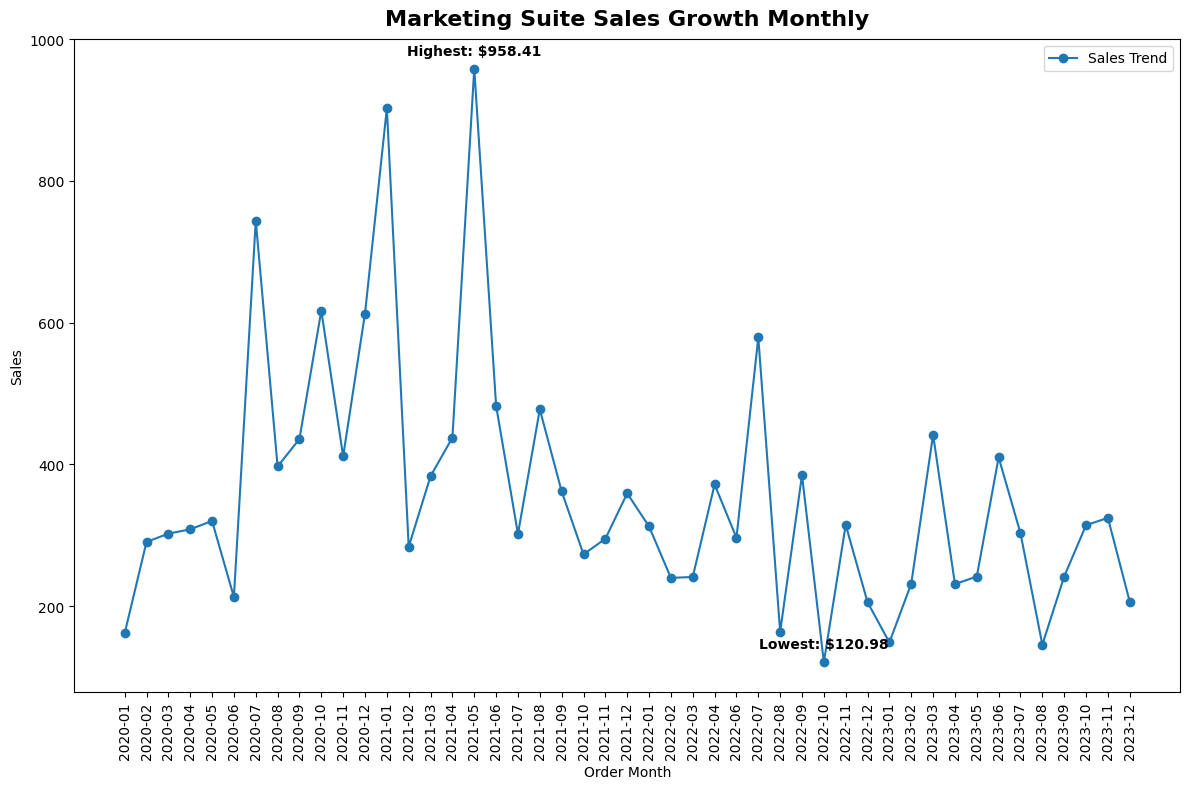

In [58]:
plt.figure(figsize=(12, 8))
sales_values = df_sales['Sales'].str.replace('$', '').astype(float)
plt.plot(df_sales['Order Month'].astype(str), sales_values, marker='o', linestyle='-', label='Sales Trend')

# Finding the index of the highest and lowest values
max_index = sales_values.idxmax()
min_index = sales_values.idxmin()

# Annotating the highest and lowest values with a cleaner format
plt.annotate(f"Highest: {df_sales['Sales'][max_index]}", 
             (df_sales['Order Month'].astype(str)[max_index], sales_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')
plt.annotate(f"Lowest: {df_sales['Sales'][min_index]}", 
             (df_sales['Order Month'].astype(str)[min_index], sales_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Marketing Suite Sales Growth Monthly', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


### **Insight**

1. Fluktuasi Penjualan: Angka penjualan berfluktuasi secara signifikan sepanjang periode Januari 2020 hingga Desember 2023. Hal ini dapat disebabkan oleh berbagai faktor seperti tren musiman, kampanye pemasaran, atau perubahan kondisi pasar.

2. Penjualan Puncak: Angka penjualan tertinggi adalah $958,41 yang terjadi pada Mei 2021. Hal ini dapat menunjukkan strategi penjualan yang sukses atau peak shopping season.

3. Penjualan Terendah: Angka penjualan terendah adalah $120,98, yang terjadi pada bulan Oktober 2022. Hal ini dapat menunjukkan periode penjualan yang lambat atau perlunya peningkatan upaya pemasaran selama ini.

4. Tren Terkini: Dalam beberapa bulan terakhir tahun 2023, penjualan tampaknya relatif stabil, dengan angka sebagian besar berkisar antara $200 hingga $400. Namun, terdapat penurunan yang signifikan pada bulan Agustus 2023, yang mungkin memerlukan penyelidikan lebih lanjut.

### **Profit Per Bulan**

In [59]:
dfProfit = df_msuite.groupby("Order Month")[["Profit"]].median().reset_index()
dfProfit['Profit'] = dfProfit['Profit'].map('${:,.2f}'.format)

dfProfit.head()


,Order Month,Profit
0,2020-01,$-24.68
1,2020-02,$3.42
2,2020-03,$-12.10
3,2020-04,$-18.15
4,2020-05,$-94.81


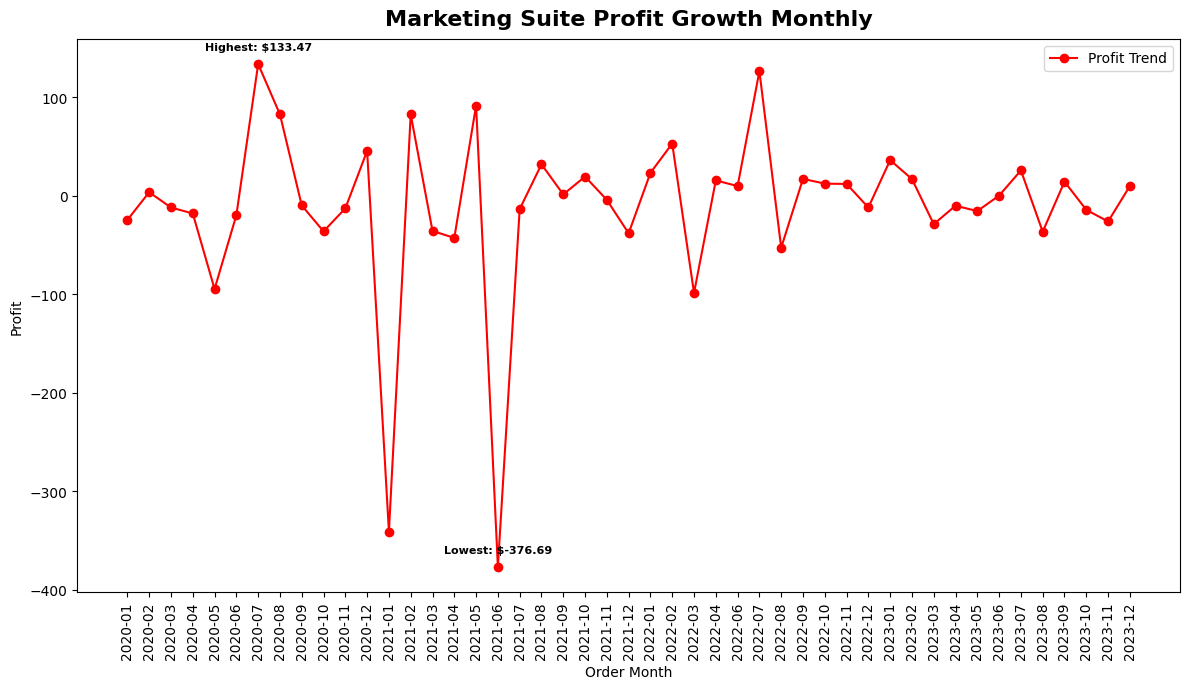

In [60]:
plt.figure(figsize=(12, 7))
profit_values = dfProfit['Profit'].str.replace('$', '').astype(float)
plt.plot(dfProfit['Order Month'].astype(str), profit_values, marker='o', linestyle='-', color='red', label='Profit Trend')

# Finding the index of the highest and lowest values
max_index = profit_values.idxmax()
min_index = profit_values.idxmin()

# Annotating the highest and lowest values with a cleaner format
plt.annotate(f"Highest: {dfProfit['Profit'][max_index]}", 
             (dfProfit['Order Month'].astype(str)[max_index], profit_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {dfProfit['Profit'][min_index]}", 
             (dfProfit['Order Month'].astype(str)[min_index], profit_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Marketing Suite Profit Growth Monthly', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

### **Insight**

1. Fluktuasi Profit: Angka Profit berfluktuasi secara signifikan sepanjang periode Januari 2020 hingga Desember 2023. Hal ini bisa disebabkan oleh berbagai faktor seperti perubahan penjualan, harga pokok penjualan, beban operasional, atau biaya lainnya.

2. Peak Profit: Angka profit tertinggi adalah $133,47 yang terjadi pada Juli 2020. Hal ini dapat menunjukkan keberhasilan strategi penjualan, pengurangan biaya, atau peak shopping season.

3. Profit Terendah: Angka Profit terendah adalah kerugian sebesar $376,69 yang terjadi pada bulan Juni 2021. Hal ini dapat menunjukkan periode penjualan yang lambat, peningkatan biaya, atau perlunya perbaikan strategi bisnis selama ini.

4. Tren Terkini: Dalam beberapa bulan terakhir tahun 2023, keuntungan tampaknya relatif stabil, dengan angka sebagian besar berkisar antara -$50 hingga $50. Namun, terdapat penurunan yang signifikan pada bulan Agustus 2023, yang mungkin memerlukan penyelidikan lebih lanjut

In [61]:
df_profit_margin = df_msuite.groupby("Order Month")[["Profit Margin"]].median().reset_index()
df_profit_margin['Profit Margin'] = df_profit_margin['Profit Margin'].apply(lambda x: f"{x:.2f}%")
df_profit_margin.head()


,Order Month,Profit Margin
0,2020-01,-42.41%
1,2020-02,1.18%
2,2020-03,-5.88%
3,2020-04,-5.88%
4,2020-05,-26.30%


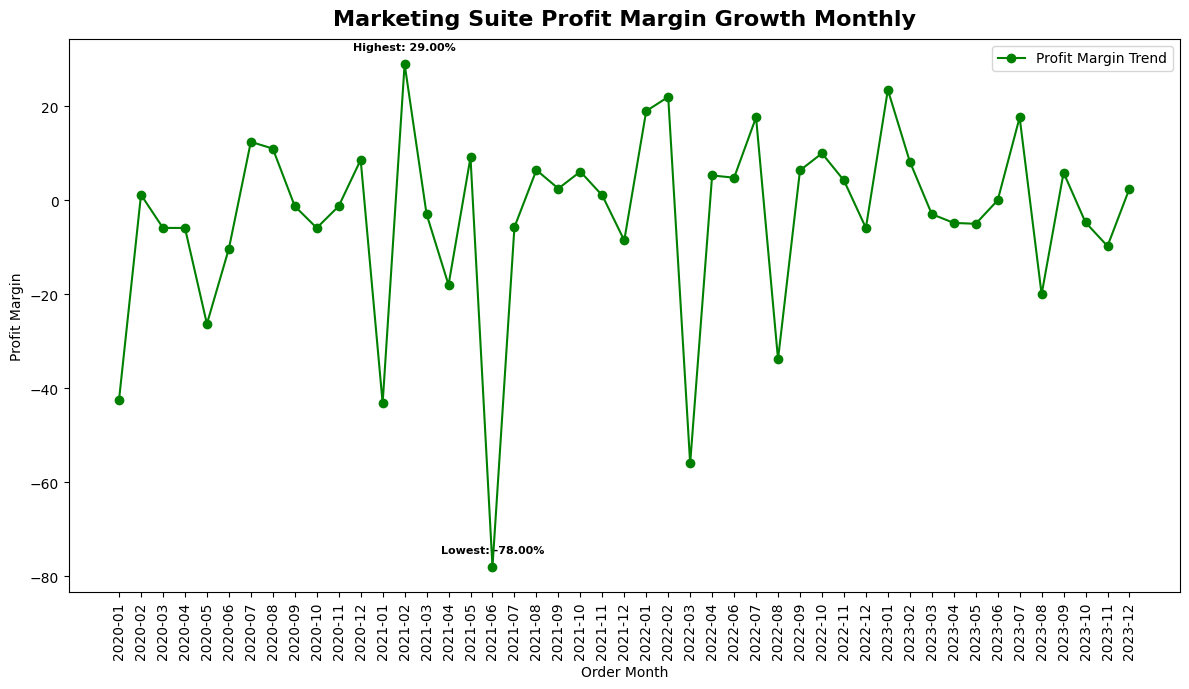

In [62]:
plt.figure(figsize=(12, 7))
profit_margin_values = df_profit_margin['Profit Margin'].str.rstrip('%').astype(float)  # Removing '%' symbol and converting to numeric
plt.plot(df_profit_margin['Order Month'].astype(str), profit_margin_values, marker='o', linestyle='-', color='green', label='Profit Margin Trend')

# Finding the index of the highest and lowest values
max_index = profit_margin_values.idxmax()
min_index = profit_margin_values.idxmin()

# Annotating the highest and lowest values with a cleaner format
plt.annotate(f"Highest: {df_profit_margin['Profit Margin'][max_index]}", 
             (df_profit_margin['Order Month'].astype(str)[max_index], profit_margin_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {df_profit_margin['Profit Margin'][min_index]}", 
             (df_profit_margin['Order Month'].astype(str)[min_index], profit_margin_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Profit Margin')
plt.title('Marketing Suite Profit Margin Growth Monthly', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

### **Insight**

1. Fluktuasi Profit Margin: Angka Profit Margin berfluktuasi secara signifikan sepanjang periode Januari 2020 hingga Desember 2023. Hal ini dapat disebabkan oleh berbagai faktor seperti perubahan penjualan, harga pokok penjualan, biaya operasional, atau biaya lainnya.

2. Peak Profit Margin: Angka Profit Margin tertinggi sebesar 29,00% terjadi pada bulan Februari 2021. Hal ini dapat mengindikasikan keberhasilan strategi penjualan, pengurangan biaya, atau puncak musim belanja.

3. Profit Margin Terendah: Angka Profit Margin terendah adalah kerugian sebesar 78,00% yang terjadi pada bulan Juni 2021. Hal ini dapat mengindikasikan periode penjualan yang lambat, peningkatan biaya, atau perlunya perbaikan strategi bisnis selama ini.

4. Tren Terkini: Dalam beberapa bulan terakhir tahun 2023, Profit Margin tampaknya relatif stabil, dengan angka sebagian besar berkisar antara -10% hingga 20%. Namun, terdapat penurunan yang nyata pada bulan Agustus 2023, yang mungkin memerlukan penyelidikan lebih lanjut.

In [63]:
df_discount = df_msuite.groupby("Order Month")[["Discount"]].median().reset_index()
df_discount['Discount'] = (df_discount['Discount'] * 100).apply(lambda x: f"{x:.2f}%")
df_discount.head()

,Order Month,Discount
0,2020-01,32.50%
1,2020-02,15.00%
2,2020-03,15.00%
3,2020-04,15.00%
4,2020-05,32.50%


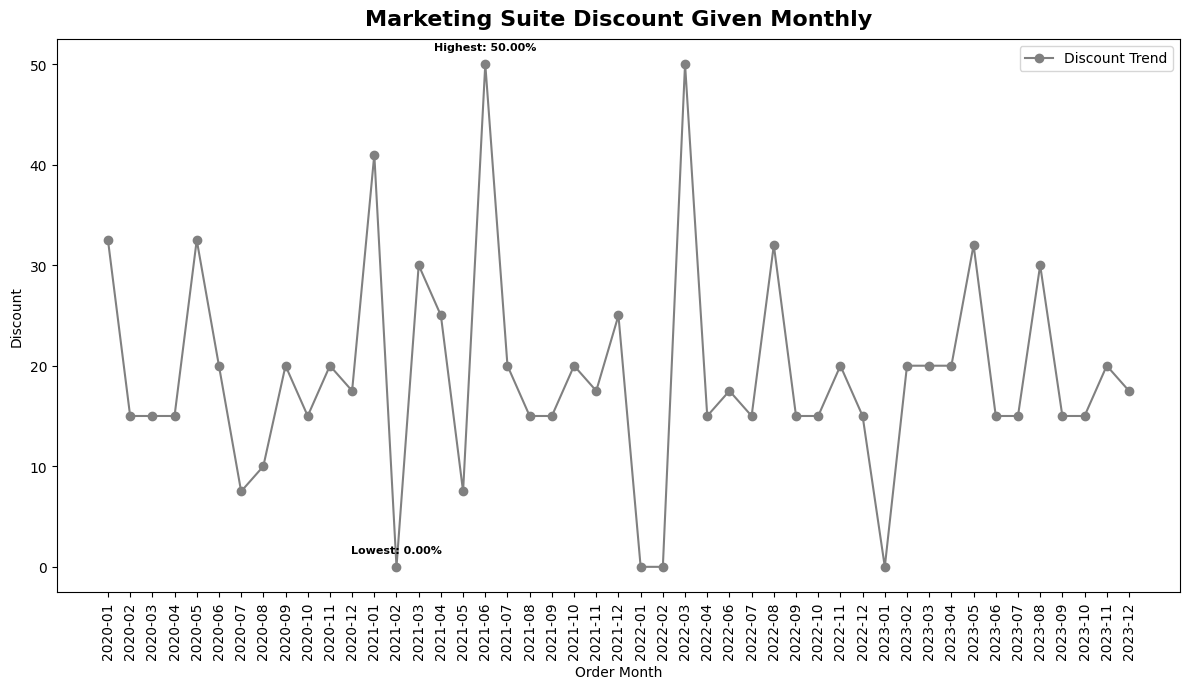

In [64]:
plt.figure(figsize=(12, 7))
discount_values = df_discount['Discount'].str.replace('%', '').astype(float)
plt.plot(df_discount['Order Month'].astype(str), discount_values, marker='o', linestyle='-', color='grey', label='Discount Trend')

# Finding the index of the highest and lowest values
max_index = discount_values.idxmax()
min_index = discount_values.idxmin()

# Annotating the highest and lowest values with a cleaner format
plt.annotate(f"Highest: {df_discount['Discount'][max_index]}", 
             (df_discount['Order Month'].astype(str)[max_index], discount_values[max_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')
plt.annotate(f"Lowest: {df_discount['Discount'][min_index]}", 
             (df_discount['Order Month'].astype(str)[min_index], discount_values[min_index]),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, fontweight='bold')

plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Marketing Suite Discount Given Monthly', size=16, pad=10, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

### **Insight**

1. Variasi Diskon : Diskon yang diberikan sangat bervariasi dari bulan ke bulan, dengan yang tertinggi sebesar 50,00% dan terendah sebesar 0,00%. Tidak ada tren yang jelas dalam tingkat diskon; mereka berfluktuasi dari bulan ke bulan.

2. Diskon Tertinggi: Diskon tertinggi sebesar 50,00% diberikan pada bulan Juni 2021 dan Maret 2022.

3. Tidak Ada Diskon: Tidak ada diskon (0,00%) yang diberikan pada bulan Februari 2021, Januari 2022, dan Februari 2022.

4. Tren Terkini: Pada bulan-bulan terakhir tahun 2023, diskon berkisar antara 15,00% hingga 32,00%, kecuali Januari 2023 yang tidak diberikan diskon.


## **Analisis dampak Discount terhadap Profitability**

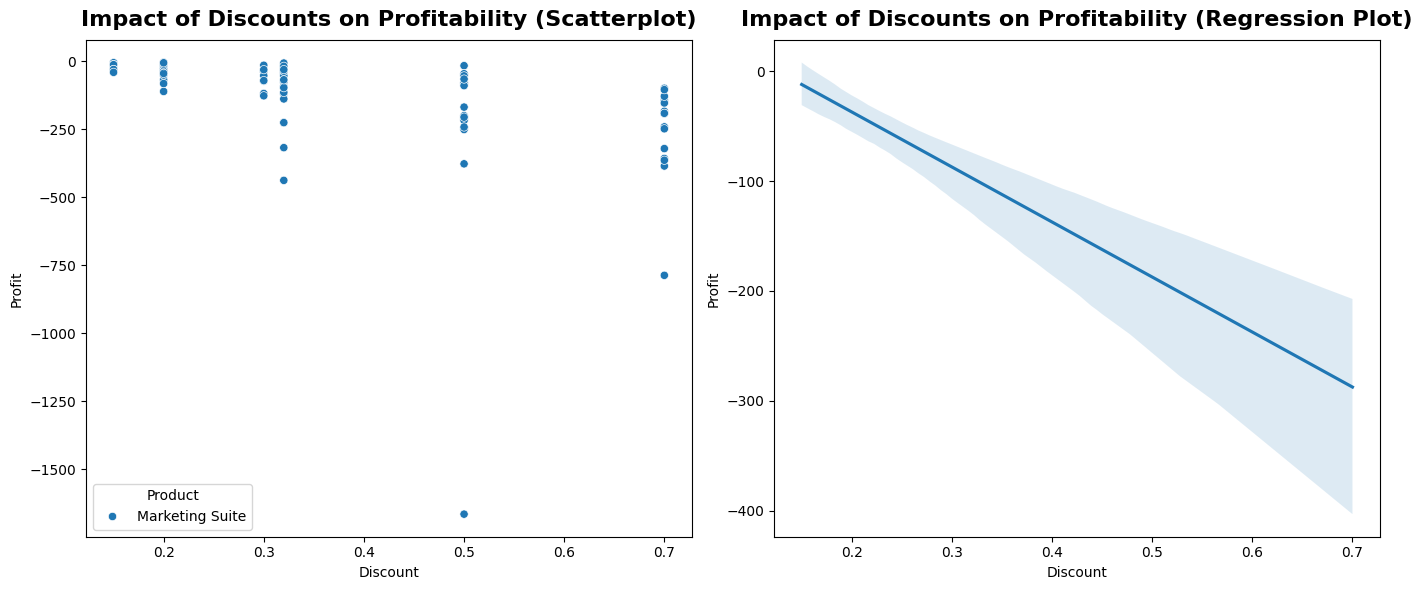

In [65]:
# Filter the DataFrame for products with negative profit
negative_profit_products = df_msuite[df_msuite['Profit'] < 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting regression plot
sns.regplot(x='Discount', y='Profit', data=negative_profit_products, scatter=False, ax=ax2)
ax2.set_title('Impact of Discounts on Profitability (Regression Plot)', size=16, pad=10, fontweight='bold')
ax2.set_xlabel('Discount')
ax2.set_ylabel('Profit')

# Plotting scatterplot
sns.scatterplot(x='Discount', y='Profit', data=negative_profit_products, hue='Product', ax=ax1)
ax1.set_title('Impact of Discounts on Profitability (Scatterplot)', size=16, pad=10, fontweight='bold')
ax1.set_xlabel('Discount')
ax1.set_ylabel('Profit')
ax1.legend(title='Product')

plt.tight_layout()
plt.show()


### **Insight**

1. Korelasi Negatif: Kedua plot menggambarkan korelasi negatif antara diskon dan profitabilitas produk Marketing Suite. Ketika diskon meningkat, profitabilitas menurun.

2. Scatterplot: Scatterplot di sebelah kiri menunjukkan profit pada berbagai tingkat diskon untuk “Marketing Suite” (berwarna biru). Baik “Product” maupun “Marketing Suite” menunjukkan penurunan profit seiring dengan meningkatnya discount.

3. Regression Plot: Regression plot di sebelah kanan menunjukkan trend line negatif yang jelas yang menunjukkan bahwa seiring dengan meningkatnya diskon, keuntungan menurun. Area yang diarsir mewakili interval kepercayaan di sekitar garis regresi.

Insight ini menunjukkan bahwa meningkatkan diskon dapat menyebabkan penurunan profitabilitas pada produk Marketing Suite

## **Segmentasi Customer**

### **Total Profit Marketing Suite berdasarkan Region**

In [66]:
df_region = df_msuite.groupby('Region')['Profit'].sum().sort_values(ascending=True)
df_region.head()

Region
APJ    -1895.6634
EMEA   -1629.6682
AMER      52.7756
Name: Profit, dtype: float64

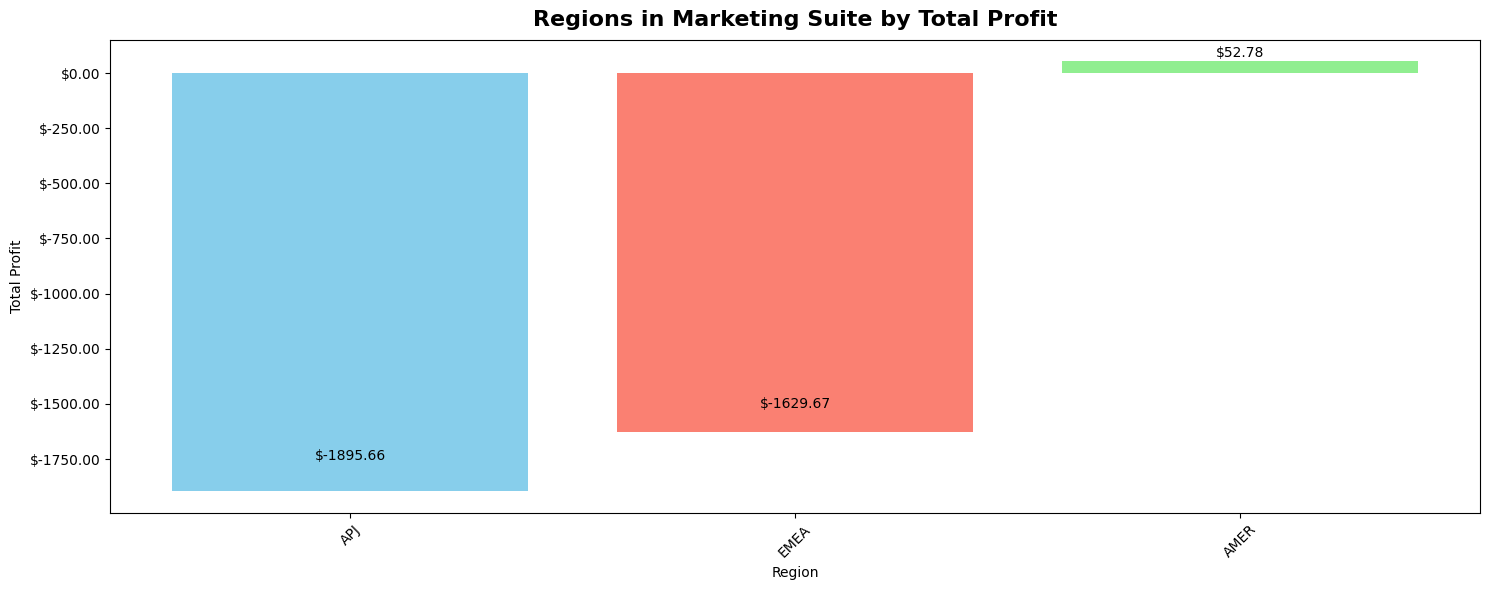

In [67]:

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(15, 6))

# Custom colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(df_region.head().items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position based on value sign
    text_position = value + 0.1 * value if value >= 0 else value - 0.1 * value
    plt.text(i, text_position, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Regions in Marketing Suite by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

**Insight**

1. AMER menjadi satu-satunya Region yang menghasilkan profit dengan total profit $52.78
2. APJ dan EMEA menghasilkan kerugian dengan total kerugian mencapai -1895.66 dan -1629.67.
3. APJ menjadi Region dengan total kerugian paling besar diikuti oleh EMEA
4. Terdapat perbedaan signifikan antara Profit dari AMER dan Kerugian dari EMEA dan APJ.

Data ini menyimpulkan bahwa Marketing Suite melakukan performa bagus pada Region AMER tetapi menghadapi tantangan di Region EMEA dan APJ.

### **Total Profit Marketing Suite berdasarkan Sub-Region**

In [68]:
df_Subregion = df_msuite.groupby('Subregion')['Profit'].sum().sort_values(ascending=True)
df_Subregion.head()

Subregion
EU-WEST   -3257.8735
JAPN      -2391.1377
EU-EAST   -2184.3301
LATAM     -1936.2213
ANZ        -555.8726
Name: Profit, dtype: float64

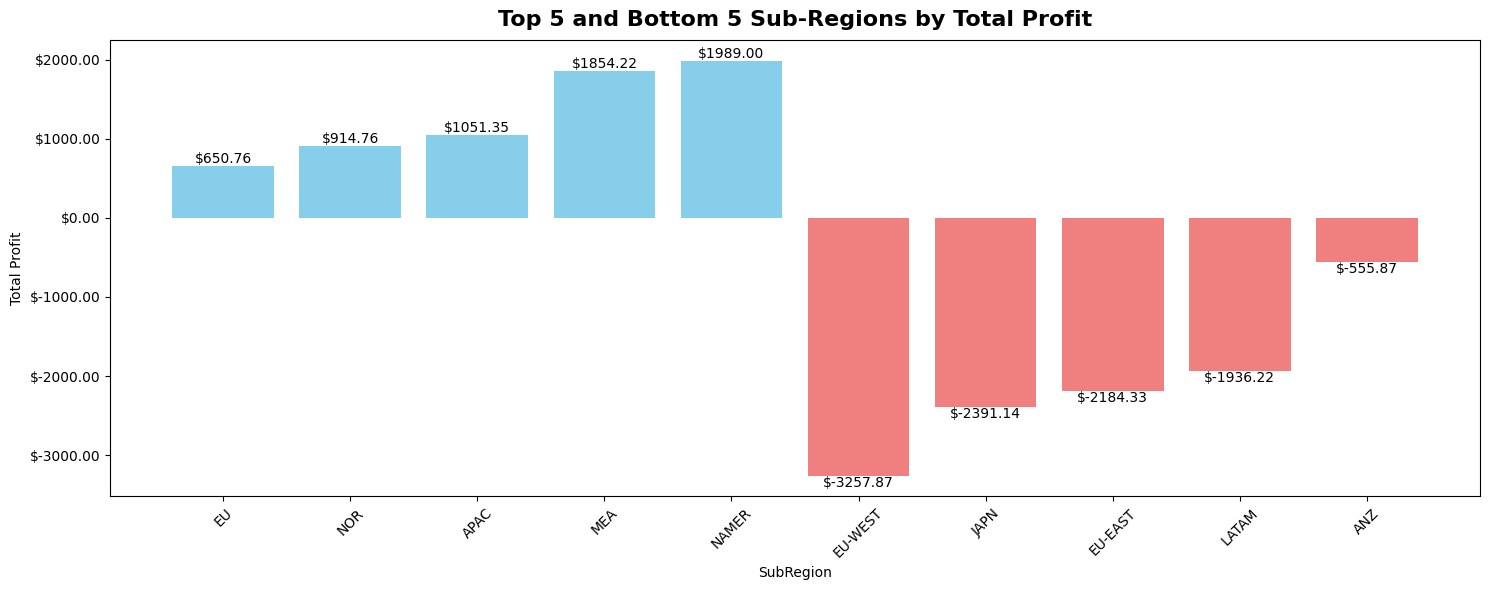

In [69]:
# Splitting into top 5 and bottom 5
top_5 = df_Subregion.tail(5)
bottom_5 = df_Subregion.head(5)

# Combining top and bottom 5 for plotting
combined_data = pd.concat([top_5, bottom_5])

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(15, 6))

# Custom colors for bars
colors = ['skyblue'] * 5 + ['lightcoral'] * 5  # Assigning colors for top and bottom separately

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(combined_data.items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position to center the annotation
    plt.text(i, value, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 Sub-Regions by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('SubRegion')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

**Insight**

1. Sub-region yang menguntungkan adalah UE, NOR, APAC, MEA, dan NAMER dengan keuntungan masing-masing sebesar $650,76, $914,76, $1051,35, $1854,22, dan $1989,00.

2. Sub-region yang tidak menguntungkan adalah EU-WEST, JPN, EUEAST, LATAM dan ANZ dengan kerugian masing-masing sebesar -$3257.87, -$2391.14, -$2184.33, -$1936.22, dan -$555.87.

3. NAMER merupakan sub-region dengan keuntungan tertinggi, sedangkan EU-WEST merupakan sub-region dengan kerugian tertinggi.

**Data ini menunjukkan bahwa Marketing Suite melakukan performa baik di Sub-region NAMER,MEA,APAC,NOR dan EU tetapi menghadapi tantangan di region EU-WEST,JAPN,EU-EAST,LATAM, dan ANZ.**

### **Total Profit Marketing Suite berdasarkan Country**

In [70]:

df_Country = df_msuite.groupby('Country')['Profit'].sum().sort_values(ascending=True)

# Convert the Series to a DataFrame
df_Country = pd.DataFrame(df_Country).reset_index()

# Display the first few rows
df_Country

,Country,Profit
0,France,-2896.7601
1,Russia,-2408.9163
2,Japan,-2391.1377
3,Mexico,-1359.0516
4,Chile,-869.2073
5,Belgium,-616.8158
6,Australia,-555.8726
7,Germany,-116.0706
8,Sweden,-97.9780
9,South Africa,-6.3236


### **Visualisasi Folium Untuk Negara yang Memiliki Keuntungan Negatif dan Positif dalam Marketing Suite**

In [71]:
import urllib3

urllib3.disable_warnings()

In [73]:
import requests
from geopy.geocoders import Nominatim

def get_country_coordinates(country_name):
    geolocator = Nominatim(user_agent="geoapi")
    
    # Use requests without SSL verification
    session = requests.Session()
    session.verify = False
    
    url = f"https://nominatim.openstreetmap.org/search?q={country_name}&format=json&limit=1"
    response = session.get(url)
    if response.ok:
        data = response.json()
        if data:
            latitude = float(data[0]['lat'])
            longitude = float(data[0]['lon'])
            return latitude, longitude
    return None, None

# Assuming df_Country is the result of your previous operation
# Add latitude and longitude columns to df_Country
latitude = []
longitude = []
for i in df_Country['Country']:
    lat, long = get_country_coordinates(i)
    latitude.append(lat)
    longitude.append(long)

df_Country['Latitude'] = latitude
df_Country['Longitude'] = longitude

df_Country



**Countries and Profit:**

**Negara dengan Positif Profit (tanda biru):**

1. Croatia: 39.7488
2. Israel: 41.1684
3. Ireland: 41.9136
4. Poland: 53.2350
5. Singapore: 54.7136
6. Czech Republic: 57.1928
7. China: 105.6054
8. Ukraine: 126.2250
9. Norway: 129.4762
10. Argentina: 141.3920
11. Brazil: 150.6456
12. United Arab Emirates: 172.4814
13. Turkey: 218.2624
14. Spain: 278.7892
15. United Kingdom: 350.8744
16. South Korea: 414.0936
17. Saudi Arabia: 456.6770
18. Philippines: 476.9343
19. Canada: 570.0054
20. Italy: 650.7630
21. Finland: 883.2620
22. Egypt: 1013.1270
23. United States: 1418.9915

**Negara dengan Negatif Profit(tanda merah):**

1. France: -2896.7601
2. Russia: -2408.9163
3. Japan: -2391.1377
4. Mexico: -1359.0516
5. Chile: -869.2073
6. Belgium: -616.8158
7. Australia: -555.8726
8. Germany: -116.0706
9. Sweden: -97.9780
10. South Africa: -6.3236




* **Insight**

1. Profitable Country mencangkup United Stated, Egypt, Findland, Italy dengan masing-masing Profit $1418.99, $1013.12, $883.26, $650.76.
2. Non-Profitable Country mencangkup France, Russia, Japan, Mexico dan Chile dengan jumlah masing-masing kerugian mencapai $2896.76, $2408.91, $2391.14, $869.20
3. United States menghasilkan Profit terbesar sementara Chile menghasilkan Profit terkecil.

Data ini menunjukkan bahwa Marketing Suite melakukan performa baik di United States, Egypt, Findland, dan Italy sementara itu di Negara lain seperti France, Russia, Japan, Mexico dan Chile menghadapi kesulitan terhadap Keuntungan. Strategi di negara-negara ini mungkin perlu ditinjau ulang untuk meningkatkan kinerja

In [101]:
df_City = df_msuite.groupby('City')['Profit'].sum().sort_values(ascending=True)
df_City.head()


City
Paris           -2568.1413
St Petersburg   -1331.3179
Tokyo           -1120.4223
Mexico City      -884.9520
Moscow           -653.1820
Name: Profit, dtype: float64

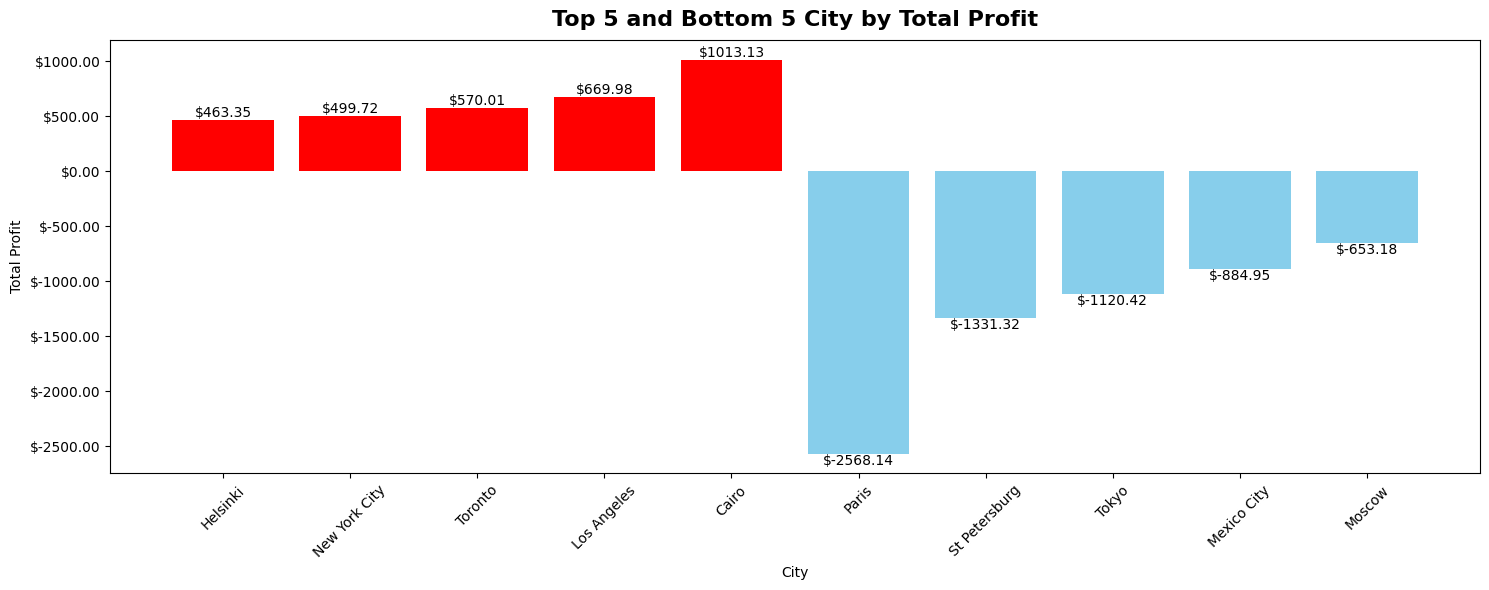

In [102]:
# Splitting into top 5 and bottom 5
top_5 = df_City.tail(5)
bottom_5 = df_City.head(5)

# Combining top and bottom 5 for plotting
combined_data = pd.concat([top_5, bottom_5])

# Plotting with different colors for each bar and annotations
plt.figure(figsize=(15, 6))

# Custom colors for bars
colors = ['red'] * 5 + ['skyblue'] * 5  # Assigning colors for top and bottom separately

# Plotting each bar individually with different color and annotation
for i, (index, value) in enumerate(combined_data.items()):
    plt.bar(index, value, color=colors[i])
    
    # Adjusting text position to center the annotation
    plt.text(i, value, f'${value:.2f}', ha='center', va='bottom' if value >= 0 else 'top')

plt.title('Top 5 and Bottom 5 City by Total Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Formatting y-axis ticks to display '$' sign with values
plt.gca().yaxis.set_major_formatter('${:.2f}'.format)

plt.tight_layout()
plt.show()

**Insight**

1. Kota yang menghasilkan Profit yaitu Cairo, Los Angeles, Toronto, New York City dan Helsinki dengan total Profit masing-masing $1013.13, $669.98, $570.01, $499.72, dan $463.35.

2. Kota yang tidak menghasilkan Profit yaitu Paris, St. Petersburg, Tokyo, Mexico City dan Moscow dengan masing-masing kerugian $2568.14, $1331.32, $1120.42, $884.95, $653.18.

3. Kota yang menghasilkan Profit tertinggi yaitu Cairo sementara Paris mengalami Kerugian terbesar.

Data ini menunjukkan bahwa Marketing Suite melakukan Performa baik di Cairo, Los Angeles, Toronto, New York City dan Helsinki sementara itu ada beberapa kota yang menghadapi kesulitan terhadap Profit yaitu Paris, St. Petersburg, Tokyo, Mexico City dan Moskow.

In [109]:
proportion = df_msuite['Segment'].value_counts()/len(df)
proportion

Segment
SMB           0.013108
Strategic     0.006404
Enterprise    0.003302
Name: count, dtype: float64

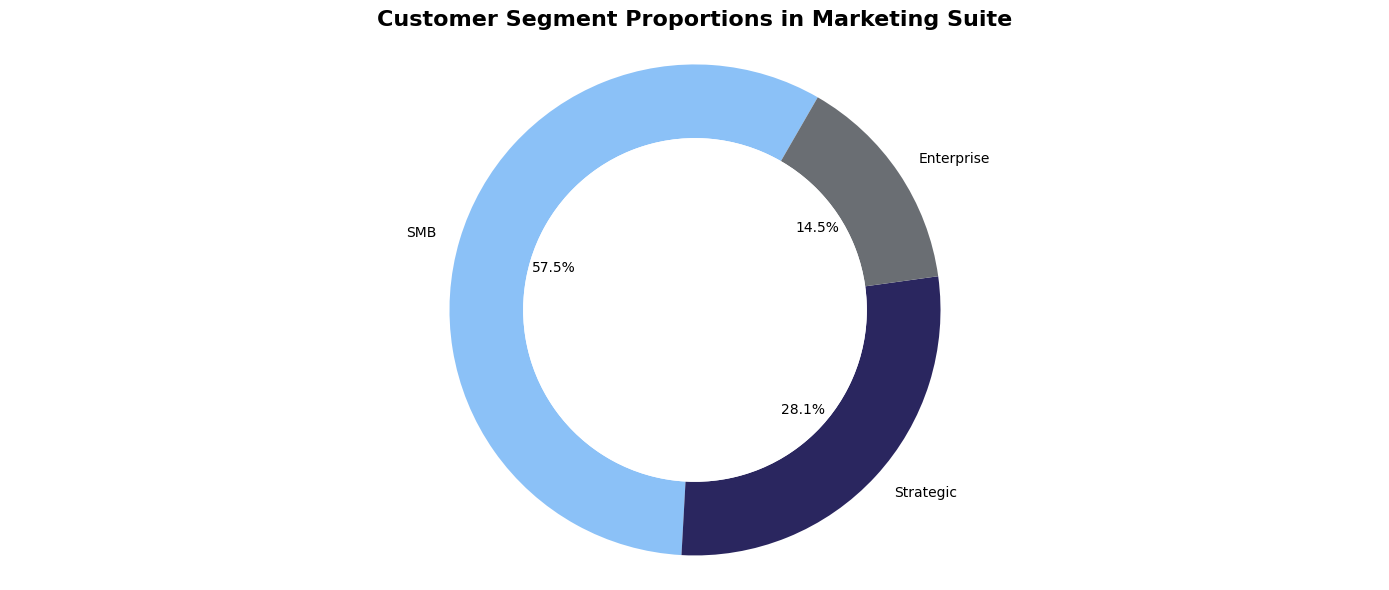

In [111]:
plt.figure(figsize=(14, 6))

# Custom colors for the pie chart (modify these colors as needed)
colors = ['#8BC1F7', '#2A265F', '#6A6E73']  

plt.pie(
    proportion.values,
    labels=proportion.index,
    autopct='%1.1f%%',
    startangle=60,
    colors=colors,
    wedgeprops=dict(width=0.3),
    textprops={'color': 'black'}
)

plt.axis('equal')  # To make the pie plot look like a circle
plt.title('Customer Segment Proportions in Marketing Suite',size=16, pad=10, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

# Displaying the plot
plt.show()

**Insight**

1. SMB (Small and Medium-Sized Businesses): Segmen SMB merupakan segmen paling besar mencakup 57.5% dari total customer base.

2. Strategic: Segmen ini memiliki 28.1% dari total customer base.

3. Enterprise: Segmen ini merupakan segmen terendah mencakup 14.5% dari total customer base.

Data ini sangat berguna untuk memahami customer base perusahaan dan mengambil keputusan yang tepat dalam strategi pemasaran, sebagai contoh, SMB merupakan mayoritas, upaya pemasaran bisa lebih dioptimalkan untuk melayani lebih banyak pada segmen ini.

### **Test Hipotesis pada Segment Vs Profit**

Segment Vs Profit: jika segment merupakan variable categorical, kita bisa memakai t-test (jika terdapat lebih dari 2 segmen) atau Anova Kruskal Wallis karena data tidak normal (jika terdapat lebih dari 2 segmen) untuk melihat kalau Mean dari Profit secara signifikan berbeda antar segmen.

H0: Tidak ada perbedaan signifikan dalam rata-rata Profit antar segmen (SMB, Strategic, Enterprise).

Ha: Setidaknya Profit rata-rata satu segmen berbeda secara signifikan dari segmen lainnya.

H0 = Median Profit SMB = Median Profit Strategic = Median Profit Enterprise

Ha = Median profit SMB ≠ Median profit Strategic = Median profit Enterprise

In [112]:
from scipy.stats import kruskal

In [113]:
# Memfilter data fram untuk segmen secara spesifik dengan negatif profit
segments = ['SMB', 'Strategic', 'Enterprise']
filtered_df = df_msuite[df_msuite['Segment'].isin(segments) & (df_msuite['Profit'] < 0)]

# Mengambil profit data untuk setiap segmen
smbProfit = filtered_df[filtered_df['Segment'] == 'SMB']['Profit']
strategicProfit = filtered_df[filtered_df['Segment'] == 'Strategic']['Profit']
enterpriseProfit = filtered_df[filtered_df['Segment'] == 'Enterprise']['Profit']

# Kruskal-Wallis test
h_stat, p_value = kruskal(smbProfit, strategicProfit, enterpriseProfit)

print(f"Kruskal-Wallis Test:\nH-statistic: {h_stat}\nP-value: {p_value}")


Kruskal-Wallis Test:
H-statistic: 4.641761111706851
P-value: 0.09818708831175818


In [115]:

# Filter the DataFrame for only the specified segments (SMB, Strategic, and Enterprise) with negative profit
segments = ['SMB', 'Strategic', 'Enterprise']
filtered_df = df_msuite[df_msuite['Segment'].isin(segments) & (df_msuite['Profit'] < 0)]

# Collect profit data for each segment
smb_profit = filtered_df[filtered_df['Segment'] == 'SMB']['Profit']
strategic_profit = filtered_df[filtered_df['Segment'] == 'Strategic']['Profit']
enterprise_profit = filtered_df[filtered_df['Segment'] == 'Enterprise']['Profit']

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(smb_profit, strategic_profit, enterprise_profit)

# Set significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Null Hypothesis (H0): Tidak ada perbedaan signifikan dalam rata-rata Profit antar segmen (SMB, Strategic, Enterprise).")
    print("Alternative Hypothesis (Ha): Setidaknya Profit rata-rata satu segmen berbeda secara signifikan dari segmen lainnya.")
    print("Kesimpulan: Terdapat perbedaan secara signifikan di Median Profit antar segment.")
else:
    print("Null Hypothesis (H0): Tidak ada perbedaan signifikan di Median Profit antar segmen (SMB, Strategic, Enterprise).")
    print("Alternative Hypothesis (Ha): Setidaknya Profit rata-rata satu segmen berbeda secara signifikan dari segmen lainnya.")
    print("Kesimpulan: Tidak terdapat perbedaan secara signifikan di Median Profit antar segment.")



Null Hypothesis (H0): Tidak ada perbedaan signifikan di Median Profit antar segmen (SMB, Strategic, Enterprise).
Alternative Hypothesis (Ha): Setidaknya Profit rata-rata satu segmen berbeda secara signifikan dari segmen lainnya.
Kesimpulan: Tidak terdapat perbedaan secara signifikan di Median Profit antar segment.


**Insight**

Berdasarkan hasil Test Hipotesis, kesimpulannya menunjukkan bahwa rata-rata keuntungan tidak berbeda secara signifikan antar segmen (SMB, Strategic, Enterprise).

berikut adalah beberapa potensial insight:
P-value yang kami peroleh adalah 0.098, ini lebih besar dari level signifikasi yaitu 0.05, ini berarti bahwa kami gagal untuk menolak Null Hypothesis (H0), yang menyatakan bahwa tidak ada perbedaan yang signifikan pada median Profit antar segmen (SMB, Strategic, Enterprise).

Hasil dari Kruskall-Wallist test menunjukkan bahwa dengan mempertimbangkan segmen (SMB, Strategic, dan Enterprise) dengan Profit negatif, tidak ada perbedaan median Profit yang signifikan di antara segmen-segmen tersebut.

Artinya, meskipun segmen-segmen tersebut (SMB, Strategic, dan Enterprise) mengalami profit negatif, nilai median Profitnya tidak berbeda secara signifikan satu sama lain. Oleh karena itu, dalam konteks Profit negatif, nampaknya semua segmen ini mungkin menghadapi situasi serupa terkait tingkat Profit mediannya, tanpa ada satu segmen yang secara signifikan berkinerja buruk atau mengungguli segmen lainnya dalam hal Profit negatif.

### **Total Profit by Segment in Marketing Suite**


In [116]:
df_segment = df_msuite.groupby(['Segment','Customer'])['Profit'].sum().sort_values(ascending=True).reset_index()
df_segment['Profit'] = df_segment['Profit']

df_segment.head()

,Segment,Customer,Profit
0,SMB,Intel,-1597.0560
1,SMB,Nissan Motor,-1392.2704
2,Strategic,Banco Santander,-408.9124
3,Strategic,Phillips 66,-393.2583
4,SMB,Cisco Systems,-384.7164


/var/folders/f5/c1_s60hs52s0c52f55g3j2440000gn/T/ipykernel_1141/1725588770.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_customers = df_segment.groupby('Segment', group_keys=False).apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)


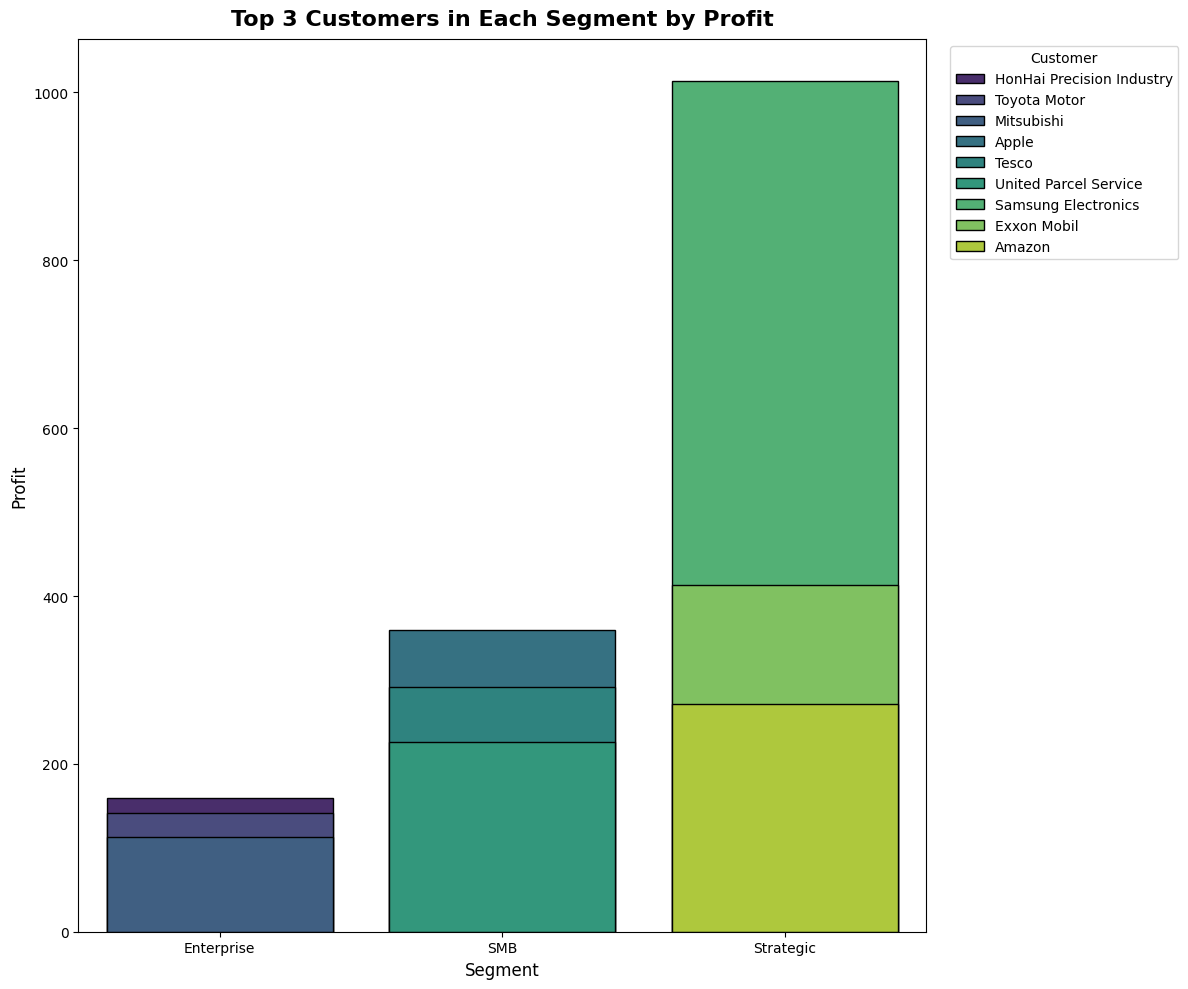

In [144]:

# Identifying the  bottom 3 customers within each segment
top_3_customers = df_segment.groupby('Segment', group_keys=False).apply(lambda x: x.nlargest(3, 'Profit')).reset_index(drop=True)



plt.figure(figsize=(12, 10))

# Creating a centered stacked bar plot for top and bottom customers within each segment
sns.barplot(
    data= top_3_customers,
    x='Segment',
    y='Profit',
    hue='Customer',
    palette='viridis',  
    edgecolor='black',  
    dodge=False  # To center the bars
)

plt.title('Top 3 Customers in Each Segment by Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Customer', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()





**Insight**

1. pada Enterprise segment, Apple memiliki profit terbesar, diikuti oleh Repsol dan Tesco.

2. pada segment SMB, United Parcel Service memiliki profit, diikuti oleh Samsung Electronics dan Exxon Mobil.

3. pada segment Strategic, Amazon mendominasi dengan keuntungan hampir mencapai seribu.

Data ini berguna untuk memahami pelanggan mana yang menghasilkan keuntungan paling besar di setiap segmen.


/var/folders/f5/c1_s60hs52s0c52f55g3j2440000gn/T/ipykernel_1141/2468630607.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_customers = df_segment.groupby('Segment', group_keys=False).apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)


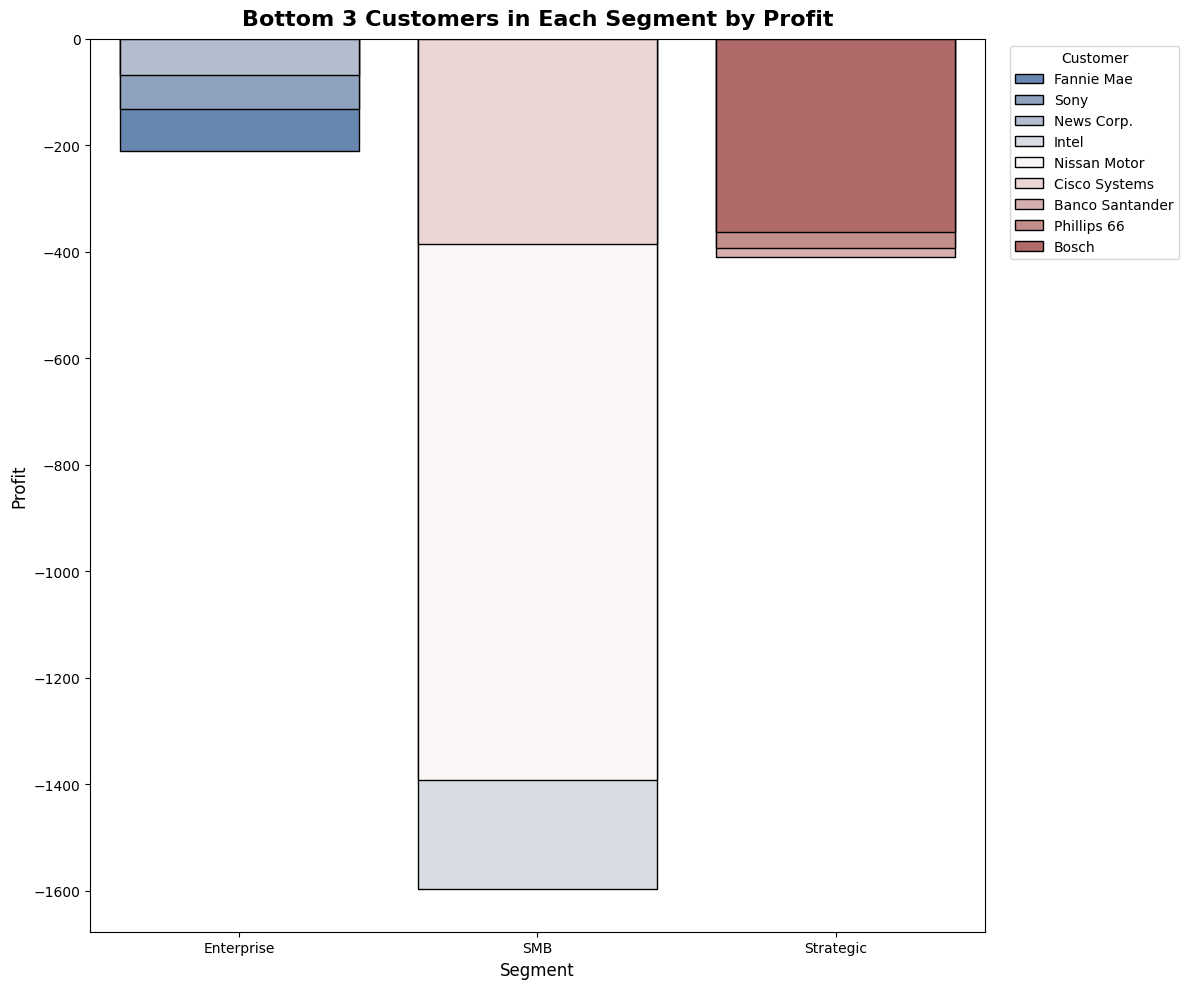

In [151]:

# Identifying the  bottom 3 customers within each segment
bottom_3_customers = df_segment.groupby('Segment', group_keys=False).apply(lambda x: x.nsmallest(3, 'Profit')).reset_index(drop=True)



plt.figure(figsize=(12, 10))

# Creating a centered stacked bar plot for top and bottom customers within each segment
sns.barplot(
    data=bottom_3_customers,
    x='Segment',
    y='Profit',
    hue='Customer',
    palette='vlag',  # You can choose any palette
    edgecolor='black',  # Add edgecolor for better separation
    dodge=False  # To center the bars
)

plt.title('Bottom 3 Customers in Each Segment by Profit', size=16, pad=10, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Customer', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()




**Insight**

1. pada Segmen Enterprise, terdapat satu pelanggan dengan batang biru es menunjukkan bahwa kerugian mencapai sekitar -200.

2. pada Segmen SMB, terdapat satu batang berwarna krem menunjukkan kerugian signifikan sekitar -1600.

3. pada Segmen Strategic, terdapat satu batang coklat muda menunjukkan kerugian mencapai sekitar -200.

Data ini dapat berguna untuk memahami pelanggan mana yang paling banyak mengalami kerugian di setiap segmen. Mungkin bermanfaat untuk menganalisis lebih lanjut faktor-faktor yang berkontribusi terhadap kerugian ini dan mengembangkan strategi untuk meningkatkan kinerjanya

### **Frekuensi Pembelian oleh Pelanggan di Marketing Suite**

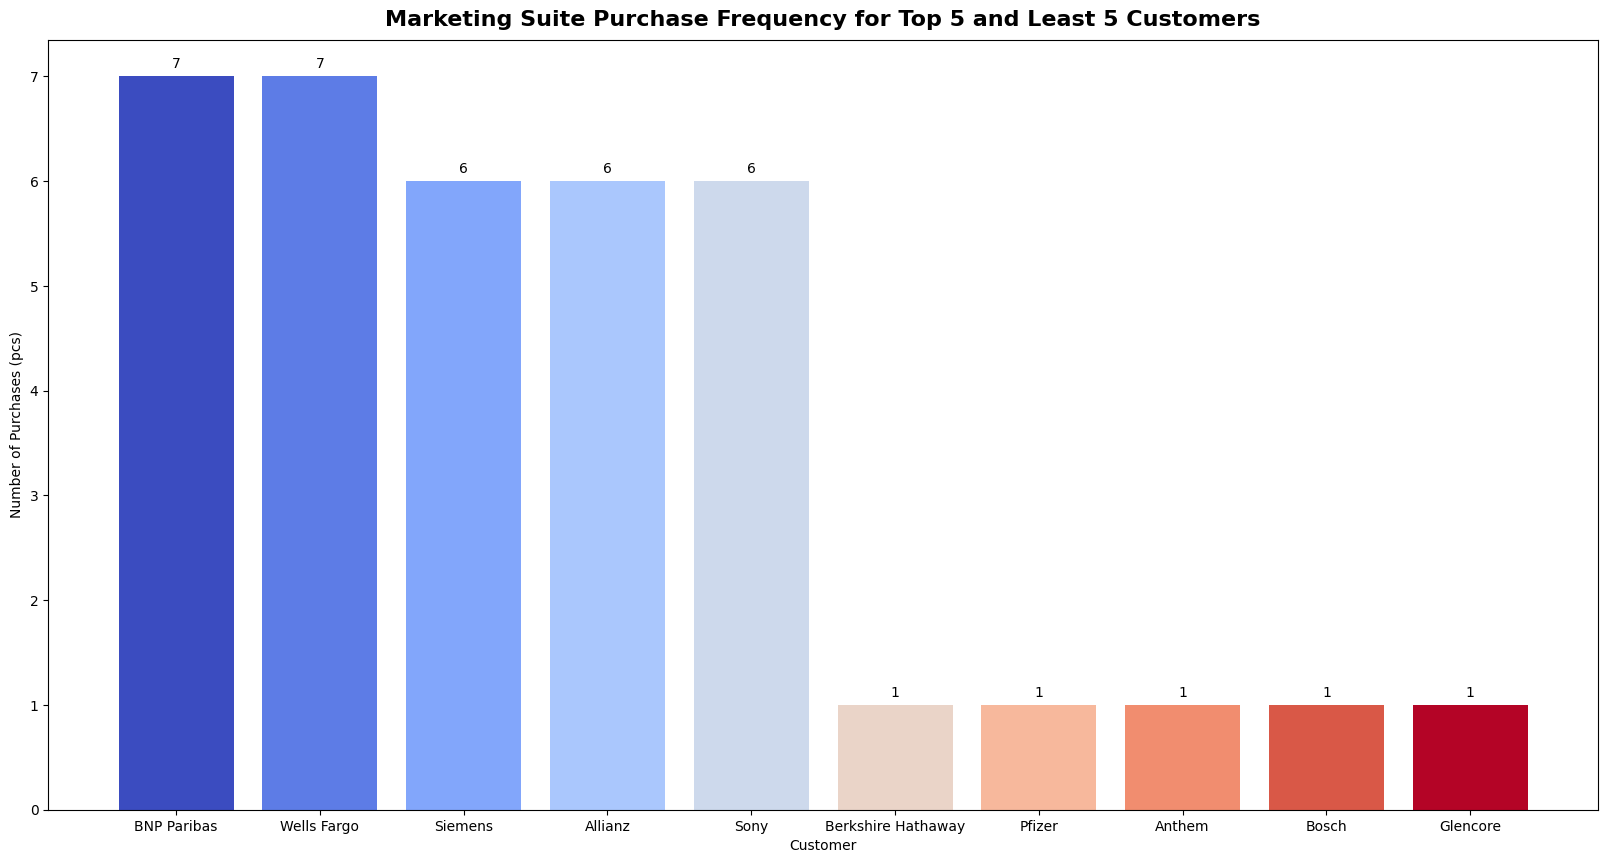

In [154]:
# Get top 5 customers
top_5_customers = df_msuite['Customer'].value_counts().nlargest(5)

# Get least 5 customers
least_5_customers = df_msuite['Customer'].value_counts().nsmallest(5)

# Concatenate the two series
selected_customers = pd.concat([top_5_customers, least_5_customers])

# Create a bar plot
plt.figure(figsize=(20,10))

# Generate random colors
colors = plt.cm.coolwarm(np.linspace(0, 1, len(selected_customers)))

# Plot the data
bars = plt.bar(selected_customers.index, selected_customers, color=colors)

plt.title('Marketing Suite Purchase Frequency for Top 5 and Least 5 Customers',size=16, pad=10, fontweight='bold')
plt.xlabel('Customer')
plt.ylabel('Number of Purchases (pcs)')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()



**Insight**

1. Frekuensi Pembelian Pelanggan: BNP Paribas dan Wells Fargo adalah pelanggan yang paling sering membeli untuk produk Marketing Suite, mungkin bermanfaat untuk memahami mengapa mereka sering melakukan pembelian meskipun produk tersebut menghasilkan keuntungan negatif.

2. Frekuensi Pembelian Rendah: Pelanggan dengan frekuensi pembelian rendah (Pelanggan Berkshire Hathaway, Pfizer, Anthem, Bosch, dan Glencore) mungkin memerlukan lebih banyak keterlibatan atau pemasaran bertarget untuk meningkatkan penggunaan produk rangkaian pemasaran.

3. Profitabilitas Produk: Jika produk Marketing-Suite secara konsisten menghasilkan negatif profit, mungkin ada baiknya melakukan analisis biaya-manfaat secara menyeluruh. Memahami struktur biaya produk dan nilai yang dirasakan pelanggan dapat memberikan wawasan apakah strategi penetapan harga memerlukan penyesuaian

,Sales,Discount,Profit,Profit Margin,Quantity
Sales,1.000000,-0.149500,0.233466,0.165776,0.617434
Discount,-0.149500,1.000000,-0.831739,-0.892099,0.144368
Profit,0.233466,-0.831739,1.000000,0.929936,-0.052914
Profit Margin,0.165776,-0.892099,0.929936,1.000000,-0.117881
Quantity,0.617434,0.144368,-0.052914,-0.117881,1.000000


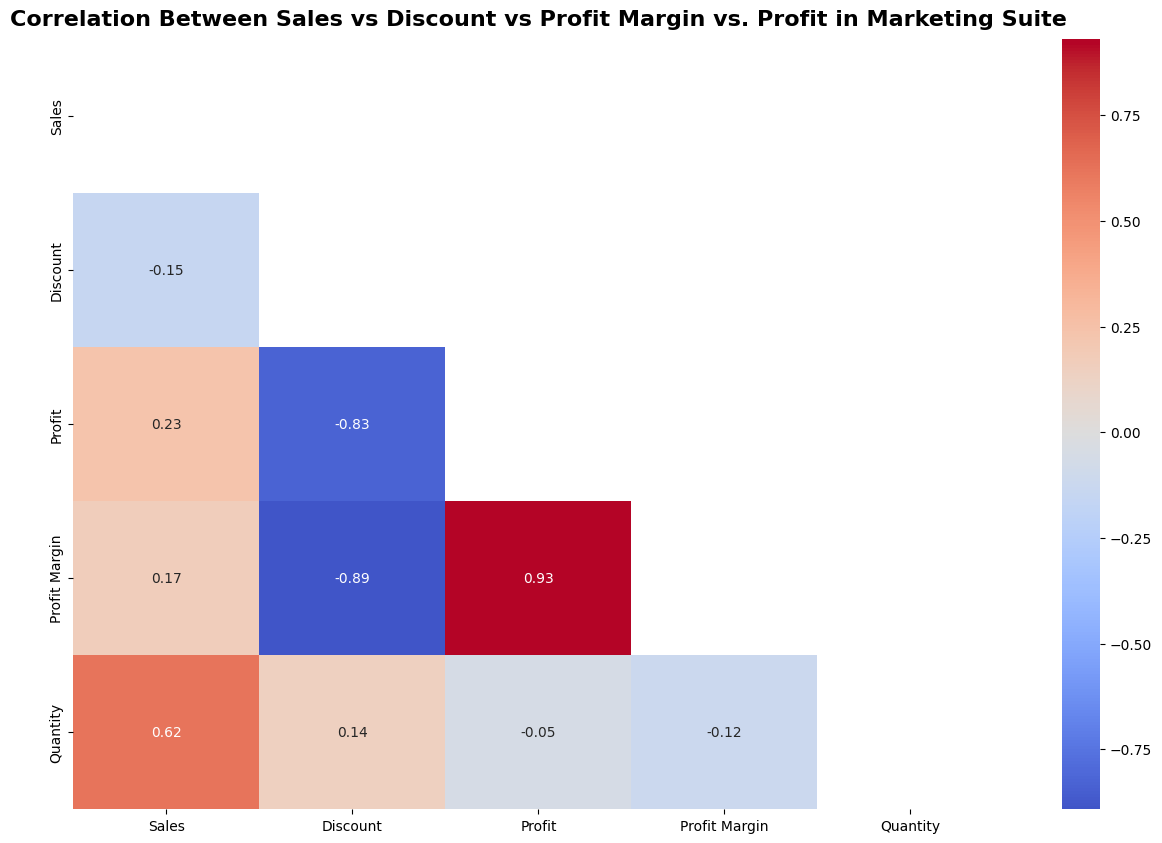

In [156]:
numerical_col = ["Sales", "Discount", "Profit", "Profit Margin",'Quantity']
correlation = df_msuite[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

plt.figure(figsize = (15, 10))
sns.heatmap(
    data = correlation,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    center = 0,
    mask = matriks
)

plt.title("Correlation Between Sales vs Discount vs Profit Margin vs. Profit in Marketing Suite", size=16, pad=10, fontweight='bold')
plt.show()

In [160]:
numerical_col = ["Sales", "Discount", "Profit", "Profit Margin",'Quantity']

for col in numerical_col:
    corr = df_msuite[col].corr(df["Profit"], method="spearman")

    if corr > 0:
        correlation = "positive"
        if  corr > 0.0 and corr <= 0.2:
            strength = "very weak"
        elif corr > 0.2 and corr <= 0.4:
            strength = "weak"    
        elif corr > 0.4 and corr <= 0.6:
            strength = "moderate"
        elif corr > 0.6 and corr <= 0.9:
            strength = "strong"
        else:
            strength = "very strong"
    else:
        correlation = "negative"
        if corr  < 0.0 and corr >= -0.2:
            strength = "very weak"
        elif corr < -0.2 and corr >= -0.4:
            strength = "weak"    
        elif corr < -0.4 and corr >= -0.6:
            strength = "moderate"
        elif corr < -0.6 and corr >= -0.9:
            strength = "strong"
        else:
            strength = "very strong"

    print(f"Korelasi Value antara {col} dan Profit adalah {corr:.2f}")
    print(f"Hubungan antara variable {col} dan variable Profit adalah '{correlation}' dengan level kekuatan korelasi '{strength}'.")
    print()


Korelasi Value antara Sales dan Profit adalah 0.23
Hubungan antara variable Sales dan variable Profit adalah 'positive' dengan level kekuatan korelasi 'weak'.

Korelasi Value antara Discount dan Profit adalah -0.83
Hubungan antara variable Discount dan variable Profit adalah 'negative' dengan level kekuatan korelasi 'strong'.

Korelasi Value antara Profit dan Profit adalah 1.00
Hubungan antara variable Profit dan variable Profit adalah 'positive' dengan level kekuatan korelasi 'very strong'.

Korelasi Value antara Profit Margin dan Profit adalah 0.93
Hubungan antara variable Profit Margin dan variable Profit adalah 'positive' dengan level kekuatan korelasi 'very strong'.

Korelasi Value antara Quantity dan Profit adalah -0.05
Hubungan antara variable Quantity dan variable Profit adalah 'negative' dengan level kekuatan korelasi 'very weak'.



**Insight**

1. Profit memiliki hubungan positif yang kuat dengan Profit Margin. Ini berarti bahwa semakin besar Profit yang didapat, semakin besar juga presentase Profit Margin yang diperoleh.

2. Sales memiliki hubungan positif yang lemah dengan Profit dan Profit Margin, ini menunjukkan bahwa ketika Sales meningkat, value dan presentase dari Profit dan Profit Margin juga meningkat.

3. Sales memiliki hubungan negatif yang lemah dengan Discount, ini menunjukkan bahwa ketika Sales menurun, itu dikarenakan Discount yang meningkat.

4. Discount memiliki hubungan yang sangat negatif dengan Profit dan Profit Margin, ini mengindikasikan bahwa ketika value dari Discount besar, Profit dan Profit Margin mengalami penurunan drastis.

5. Quantity memiliki hubungan negatif yang lemah dengan Profit dan Profit Margin, ini menunjukkan bahwa ketika Quantity meningkat, itu menyebabkan menurunnya Profit dan Profit Margin yang diperoleh perusahaan.

**Kesimpulan**

Grafik heat map memberikan wawasan berharga tentang hubungan antara berbagai variabel di Marketing Suite.
Ini menunjukkan bagaimana Profit, Sales, Discount, dan Profit Margin berinteraksi satu sama lain. Misalnya, walaupun diskon dapat meningkatkan Sales, namun tampaknya hal tersebut memiliki dampak negatif yang signifikan terhadap Profit dan Profit Margin. Oleh karena itu, mungkin ada baiknya meninjau kembali strategi diskon untuk memastikan hal itu tidak mengurangi keuntungan Anda. Demikian pula, strategi meningkatkan penjualan tampaknya mempunyai dampak positif terhadap keuntungan dan margin keuntungan, dan mungkin layak untuk diinvestasikan lebih lanjut

### **KESIMPULAN**

Produk Marketing Suite dalam perusahaan AWS SaaS secara konsisten menunjukkan margin keuntungan negatif sepanjang periode yang dianalisis. Produk ini merupakan pengganggu signifikan terhadap keseluruhan profitabilitas lini produk perusahaan. Tren negatif dalam keuntungan menunjukkan perlunya perhatian segera dan intervensi strategis.

Produk Marketing Suite secara konsisten menggambarkan tren profitabilitas negatif di berbagai dimensi analisis. Terlihat dari analisis korelasi, analisis regional, sub-regional, negara, kota, dan segmen bahwa Marketing Suite menghadapi tantangan besar di wilayah, sub-wilayah, dan segmen pelanggan tertentu.

### **Insight Keseluruhan untuk Marketing Suite**

1. Korelasi Discount-Profit: Ada korelasi negatif yang jelas antara diskon dan profitabilitas untuk Marketing Suite. Meningkatnya diskon berhubungan dengan berkurangnya profitabilitas, yang menyiratkan perlunya penilaian ulang strategi diskon.

2. Analisis Regional: Marketing Suite memiliki kinerja yang baik di wilayah tertentu seperti AMER namun mengalami kesulitan di wilayah seperti EMEA dan APJ, yang mencerminkan perlunya strategi yang disesuaikan di wilayah dengan kinerja buruk.

3. Tren Sub-Region dan Country: Profitabilitas bervariasi antar sub-region dan Country. Meskipun ada daerah yang menghasilkan keuntungan, ada pula daerah yang mengalami kerugian besar. Misalnya, ketika Canada dan Egypt menunjukkan keuntungan, Perancis dan Jepang menunjukkan kerugian yang besar.

4. Performa level-City: Kota-kota tertentu menunjukkan keuntungan positif untuk Marketing Suite, seperti Helsinki dan New York City, sementara kota-kota lain seperti Paris dan Tokyo menghadapi kerugian besar.

5. Analisis Segmen: Segmen SMB mewakili basis pelanggan terbesar, menunjukkan perlunya mengkalibrasi ulang strategi pemasaran untuk melayani segmen ini secara lebih efektif.

### **Aspek yang menguntungkan untuk Marketing Suite**

1. Pemimpin Profit Berdasarkan Segmen: Apple, United Parcel Service, dan Amazon adalah perusahaan yang menonjol di segmennya masing-masing, memberikan kontribusi signifikan terhadap Profit.

2. Profitabilitas Pelanggan: Pelanggan tertentu, seperti BNP Paribas dan Wells Fargo, menunjukkan frekuensi pembelian yang tinggi meskipun Marketing Suite mendapatkan keuntungan negatif, yang menunjukkan potensi value yang belum dimanfaatkan atau motivasi lainnya.

### **Area yang menjadi perhatian**

1. Kerugian dalam Segmen: Customer yang teridentifikasi di setiap segmen menyebabkan kerugian besar, sehingga memerlukan analisis lebih dalam untuk memahami faktor-faktor yang mendorong tren negatif ini.

2. Frekuensi Pembelian Rendah: Pelanggan seperti Berkshire Hathaway, Pfizer, Anthem, Bosch, dan Glencore mungkin memerlukan strategi pemasaran atau keterlibatan yang ditargetkan untuk meningkatkan penggunaan Marketing Suite mereka.

3. Dinamika Profitabilitas: Korelasi negatif yang kuat antara diskon dan keuntungan/margin keuntungan menunjukkan bahwa diskon yang lebih tinggi berdampak buruk terhadap profitabilitas. Hal ini menunjukkan perlunya evaluasi ulang strategi diskon untuk menjaga keseimbangan antara meningkatkan penjualan dan mempertahankan keuntungan.

**1.Strategic Customer Engagement:**

- Fokus pada pemahaman motivasi pelanggan frekuensi tinggi seperti BNP Paribas dan Wells Fargo untuk memanfaatkan wawasan ini guna strategi engagement yang lebih baik.

**2. Strategi Mitigasi Kerugian:**

- Analisis lebih lanjut faktor-faktor yang berkontribusi terhadap kerugian di antara pelanggan tertentu untuk mengembangkan strategi perbaikan yang ditargetkan atau, jika perlu, pertimbangkan untuk mengevaluasi kembali hubungan tersebut.

**3. Strategi Penetapan Harga dan Analisis Cost-Benefit:**

- Melakukan analisis biaya-manfaat menyeluruh dari Marketing Suite untuk memahami struktur biaya dan nilai yang dirasakan. Hal ini akan membantu dalam menilai apakah strategi penetapan harga sejalan dengan harapan pelanggan dan kondisi pasar.

**4. Pengoptimalan Strategi Discount:**

- Tinjau kembali dan optimalkan strategi diskon untuk mencapai keseimbangan antara mendorong penjualan dan mempertahankan margin keuntungan. Pertimbangkan diskon berjenjang atau penawaran bersyarat untuk mempertahankan profitabilitas.

**5. Inisiatif yang Berfokus pada Sales:**

- Berinvestasi dalam strategi yang meningkatkan penjualan tanpa terlalu bergantung pada diskon. Strategi-strategi ini, berdasarkan pada lemahnya hubungan positif antara penjualan dan keuntungan/margin keuntungan, berpotensi meningkatkan profitabilitas tanpa mengorbankan diskon.